# Algorytmy ewolucyjne i metaheurystyczne - Heurystyki konstrukcyjne

**Install libs**

!pip install requests
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install pandoc

**Get data url:**

In [1]:
import requests

target_url_kroa100 = "http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/kroA100.tsp"
target_url_krob100 = "http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/kroB100.tsp"
target_url_kroa200 = "http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/kroA200.tsp"
target_url_krob200 = "http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/kroB200.tsp"


def get_file_from_url(target_url):
    file = requests.get(target_url)
    return file.text

**Output test:**

In [2]:
data = get_file_from_url(target_url_krob100)
for line in data.split("\n")[6:-2]:
    print(line.split())

['1', '3140', '1401']
['2', '556', '1056']
['3', '3675', '1522']
['4', '1182', '1853']
['5', '3595', '111']
['6', '962', '1895']
['7', '2030', '1186']
['8', '3507', '1851']
['9', '2642', '1269']
['10', '3438', '901']
['11', '3858', '1472']
['12', '2937', '1568']
['13', '376', '1018']
['14', '839', '1355']
['15', '706', '1925']
['16', '749', '920']
['17', '298', '615']
['18', '694', '552']
['19', '387', '190']
['20', '2801', '695']
['21', '3133', '1143']
['22', '1517', '266']
['23', '1538', '224']
['24', '844', '520']
['25', '2639', '1239']
['26', '3123', '217']
['27', '2489', '1520']
['28', '3834', '1827']
['29', '3417', '1808']
['30', '2938', '543']
['31', '71', '1323']
['32', '3245', '1828']
['33', '731', '1741']
['34', '2312', '1270']
['35', '2426', '1851']
['36', '380', '478']
['37', '2310', '635']
['38', '2830', '775']
['39', '3829', '513']
['40', '3684', '445']
['41', '171', '514']
['42', '627', '1261']
['43', '1490', '1123']
['44', '61', '81']
['45', '422', '542']
['46', '2698',

**Get lat lon from data**

In [3]:
def get_lat_lon_from_url(target_url):
    data = get_file_from_url(target_url)
    list_of_cords = data.split("\n")[6:-2]
    return zip(*[(int(i.split()[1]), int(i.split()[2])) for i in list_of_cords])


**Calculate matrix**

In [4]:
import pandas as pd
import numpy as np
import math


def calc_matrix(lat, lon):
    matrix_size = len(lat)
    matrix = pd.DataFrame(
        np.nan, index=np.arange(matrix_size), columns=np.arange(matrix_size)
    )
    for row in range(matrix.shape[0]):
        for col in range(row, matrix.shape[1]):
            if row == col:
                matrix.iat[row, col] = np.inf
            else:
                matrix.iat[row, col] = matrix.iat[col, row] = round(
                    math.sqrt(
                        ((lat[col] - lat[row]) ** 2) + ((lon[col] - lon[row]) ** 2)
                    )
                )

    return matrix

**Display steps dynamically**

In [5]:
import matplotlib.pyplot as plt


def test_display_dynamically(tedis, distance_matrix, lat, lon):
    from IPython.display import clear_output

    for elem in tedis:
        clear_output(wait=True)
        x, y = [], []
        plt.scatter(lat, lon, color="black")
        for i, vertex in enumerate(elem):
            x.append(lat[vertex])
            y.append(lon[vertex])
            plt.scatter(lat[vertex], lon[vertex], color="red", zorder=2)
            plt.annotate(i, (lat[vertex], lon[vertex]))
        plt.scatter(lat[elem[0]], lon[elem[0]], color="green", zorder=2)
        plt.plot(x, y, zorder=1)

        path_length = calculate_path_length(elem, distance_matrix)
        plt.figtext(
            1.02,
            0.5,
            "Path length {path_length}".format(path_length=path_length),
            horizontalalignment="center",
            wrap=True,
            fontsize=10,
            bbox={"facecolor": "grey", "alpha": 0.3, "pad": 5},
        )
        plt.pause(0.02)
    plt.show()
    return True

In [6]:
def get_combs(current_tsp):
    return [
        [current_tsp[i], current_tsp[i + 1]] for i, d in enumerate(current_tsp[:-1])
    ]


def calculate_path_length(tsp_final_outcome, distance_matrix):
    return sum(
        [distance_matrix.loc[x, y].sum() for (x, y) in get_combs(tsp_final_outcome)]
    )

**NN Algorithm:**

In [7]:
def get_clossest_points(distance_matrix, idx):
    num = round(0.5 * distance_matrix.shape[0] - 1)
    neigbrs = distance_matrix.nsmallest(num, idx)
    neigbrs_list = list(neigbrs.index)
    return neigbrs_list

In [8]:
import random


def tsp_nn(distance_matrix, selected_vertex=None):
    if selected_vertex is None:
        selected_vertex = random.randint(0, 99)

    # get rid off the furthest cords
    closest_points = get_clossest_points(distance_matrix, selected_vertex)
    distance_matrix_truncated = distance_matrix.loc[
        closest_points + [selected_vertex], closest_points + [selected_vertex]
    ]

    tsp_outcome = [selected_vertex]
    test_display = [tsp_outcome.copy()]
    for _ in range(distance_matrix_truncated.shape[0] - 1):
        # find minimum in column
        ix_min = int(distance_matrix_truncated[[selected_vertex]].idxmin())
        # push min to outcome
        tsp_outcome.append(ix_min)
        test_display.append(tsp_outcome.copy())
        # set distance to 0
        distance_matrix_truncated = distance_matrix_truncated.drop(
            index=selected_vertex, columns=selected_vertex
        )
        # set vertex as ix_min
        selected_vertex = ix_min

    tsp_outcome.append(tsp_outcome[0])
    test_display[-1].append(test_display[-1][0])
    return tsp_outcome, test_display

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML

lat, lon = get_lat_lon_from_url(target_url_kroa100)
distance_matrix = calc_matrix(lat,lon)
tsp, tedis_nn= tsp_nn(distance_matrix, 41)



test_display_dynamically(tedis_nn, distance_matrix, lat, lon)

**NN ALG Run:**

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML

distance_matrix = calc_matrix(lat,lon)


for i in range(10):
    tsp, ted = tsp_nn(distance_matrix,selected_vertex = i)
    print(len(tsp))

#test_display_dynamically(ted, distance_matrix,nn=True)

**Greedy Cycle Alg**

In [213]:
import pandas as pd
import numpy as np


def get_index_min_value_in_cols(list_of_cols, distance_matrix):
    distance_matrix_truncated = distance_matrix.drop(list(set(list_of_cols)))
#     display(distance_matrix_truncated)
    min_value_list = distance_matrix_truncated[list_of_cols].min()
#     print("l", min_value_list)
    min_value = min_value_list.min()
#     print("m", min_value)
    min_value_index_in_list = min_value_list.to_list().index(min_value)
#     print("fin", min_value_index_in_list)
    col_index_in_distance_matrix = list_of_cols[min_value_index_in_list]
    ix_min = int(distance_matrix_truncated[col_index_in_distance_matrix].idxmin())
    return ix_min

In [10]:
def get_min_length_to_point(point, current_tsp, distance_matrix):
    minimal_points = []
    current_minimal = 1000000000
    for (x, y) in get_combs(current_tsp):
        distance_matrix_truncated = distance_matrix.loc[[point], [x, y]]
        new_length = distance_matrix_truncated.sum().sum()
        x_y_distance = distance_matrix.loc[x, y].sum()
        total_length_increase = new_length - x_y_distance
        if total_length_increase < current_minimal:
            minimal_points = [x, y]
            current_minimal = total_length_increase
    return minimal_points


def insert_after_element(current_tsp, elem, value_to_insert):
    elem_index = current_tsp.index(elem)
    current_tsp.insert(elem_index + 1, value_to_insert)
    return current_tsp

In [206]:
import random
import numpy as np


def tsp_greedy(distance_matrix, selected_vertex=None):
    if selected_vertex is None:
        selected_vertex = random.randint(0, 99)

    # get rid off the furthest cords
    closest_points = get_clossest_points(distance_matrix, selected_vertex)
    distance_matrix_truncated = distance_matrix.loc[
        closest_points + [selected_vertex], closest_points + [selected_vertex]
    ]

    # find min distannce and connect
    ix_start_min = int(distance_matrix_truncated[[selected_vertex]].idxmin())
    tsp_outcome = [selected_vertex, ix_start_min, selected_vertex]

    test_display = [tsp_outcome.copy()]
    for _ in range(distance_matrix_truncated.shape[0] - 2):

        # find minimum in current tsp outcome
        ix_min = int(
            get_index_min_value_in_cols(tsp_outcome, distance_matrix_truncated)
        )

        # find suitable place to insert elem
        x, y = get_min_length_to_point(ix_min, tsp_outcome, distance_matrix_truncated)

        # push min to outcome
        tsp_outcome = insert_after_element(tsp_outcome, x, ix_min)
        test_display.append(tsp_outcome.copy())

    return tsp_outcome, distance_matrix_truncated, test_display

In [214]:
%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML
lat, lon = get_lat_lon_from_url(target_url_kroa100)
distance_matrix = calc_matrix(lat,lon)
%timeit tsp, d,tedis_greedy= tsp_greedy(distance_matrix, 41)



1.19 s ± 16.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


KeyboardInterrupt: 

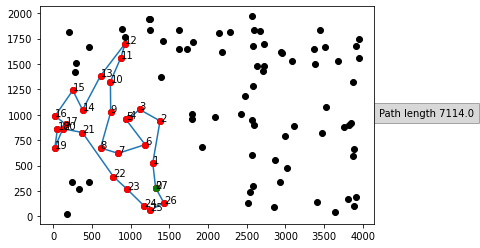

In [202]:
test_display_dynamically(tedis_greedy, distance_matrix, lat, lon)

**Regret ALG**

In [12]:
def get_cost(point, current_tsp, distance_matrix):
    minimal_points = []
    for (x, y) in get_combs(current_tsp):
        distance_matrix_truncated = distance_matrix.loc[[point], [x, y]]
        new_length = distance_matrix_truncated.sum().sum()
        x_y_distance = distance_matrix.loc[x, y].sum()
        total_cost = new_length - x_y_distance
        minimal_points.append((total_cost, x, y, point))
    # sort
    minimal_points.sort(key=lambda x: x[0])
    # 2 regret
    diff = minimal_points[1][0] - minimal_points[0][0]
    x = minimal_points[0][1]
    y = minimal_points[0][2]
    point = minimal_points[0][3]
    regret = (diff, x, y, point)
    return regret

In [13]:
def tsp_regret(distance_matrix, selected_vertex=None):
    if selected_vertex is None:
        selected_vertex = random.randint(0, 99)

    # get rid off the furthest cords
    closest_points = get_clossest_points(distance_matrix, selected_vertex)
    distance_matrix_truncated = distance_matrix.loc[
        closest_points + [selected_vertex], closest_points + [selected_vertex]
    ]
    # find min distannce and connect
    ix_start_min = int(distance_matrix_truncated[[selected_vertex]].idxmin())
    tsp_outcome = [selected_vertex, ix_start_min, selected_vertex]

    closest_points.remove(ix_start_min)
    test_display = [tsp_outcome.copy()]
    for _ in range(distance_matrix_truncated.shape[0] - 2):

        regret_scores = []
        for point in closest_points:
            regret_scores.append(get_cost(point, tsp_outcome, distance_matrix))
        regret_scores.sort(key=lambda x: x[0], reverse=True)
        _, x, _, point = regret_scores[0]
        # push min to outcome
        tsp_outcome = insert_after_element(tsp_outcome, x, point)
        test_display.append(tsp_outcome.copy())
        # delete vertex from closest
        closest_points.remove(point)

    return tsp_outcome, distance_matrix_truncated, test_display

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML

lat, lon = get_lat_lon_from_url(target_url_kroa200)
distance_matrix = calc_matrix(lat,lon)
tsp, d,tedis_regret= tsp_regret(distance_matrix, 47)



test_display_dynamically(tedis_regret, distance_matrix, lat, lon)

import pandas as pd

p = pd.read_csv("kroa2")
print(p.describe())
nn = p.loc[p["REGRET"].isin([10472])]
print(nn)

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML

distance_matrix = calc_matrix(lat,lon)
tsp,d, te = tsp_regret(distance_matrix)
print(len(tsp))
w = list(set(tsp) - set(d.columns))
print("W",w)
t = list(set([i for i in range(0,100)]) - set(tsp))
print("t",len(t))
#x,y = get_plot_points(tsp, lat, lon)

test_display_dynamically(te)

test_display_dynamically(te)

"""
TEST RUN
"""
import random

def create_comparison_table(target_url, name):    
    lat, lon = get_lat_lon_from_url(target_url)
    distance_matrix = calc_matrix(lat,lon)
    final_scores = []
    
    
    vertexes = [i for i  in range(int(len(lat)))]
#     random.shuffle(vertexes)
    #sample of vertexes
#     vertexes = vertexes[:50]
    
    for vertex in vertexes:
        print(type(vertex), vertex)
        tspnn,_  = tsp_nn(distance_matrix,selected_vertex = vertex)
        tspgreedy,_,_  = tsp_greedy(distance_matrix, selected_vertex =  vertex)
        tspregret,_,_  = tsp_regret(distance_matrix, selected_vertex=vertex)
        scores = [calculate_path_length(tspnn, distance_matrix),calculate_path_length(tspgreedy, distance_matrix),calculate_path_length(tspregret, distance_matrix)]
        final_scores.append(scores.copy())
    df = pd.DataFrame(np.array(final_scores),
                       columns=['NN', 'GREEDY', 'REGRET'],
                        index = vertexes)
    display(df)
    df.to_csv(name, index=True) 


create_comparison_table(target_url=target_url_kroa100, name = "kroa2")
create_comparison_table(target_url=target_url_krob100, name = "krob2")

In [14]:
def create_plot(tsp_outcome, lat, lon, title, distance_matrix):
    plt.cla()
    print(tsp_outcome)
    x, y = [], []
    plt.scatter(lat, lon, color="black")
    for i, vertex in enumerate(tsp_outcome):
        # print(vertex,lat[vertex],lon[vertex])
        x.append(lat[vertex])
        y.append(lon[vertex])
        plt.scatter(lat[vertex], lon[vertex], color="red", zorder=2)
        plt.annotate(i, (lat[vertex], lon[vertex]))
    x.append(x[0])
    y.append(y[0])
    plt.scatter(lat[tsp_outcome[0]], lon[tsp_outcome[0]], color="green", zorder=2)
    plt.plot(x, y, zorder=1)
    print(tsp_outcome)
    path_length = calculate_path_length(tsp_outcome, distance_matrix)
    # plt.figtext(0.0, 1.0, "Path length {path_length}".format(path_length=path_length),horizontalalignment ="center",
    #             wrap = True, fontsize = 10,
    #             bbox ={'facecolor':'grey',
    #                    'alpha':0.3, 'pad':5})

    plt.title(f"{title} \n Długość ścieżki: {path_length}", fontsize=7)
    plt.savefig(f"{title}.png", format="png", dpi=1200)

    return x, y

def test_length_tt():
    lat, lon = get_lat_lon_from_url(target_url_kroa100)
    print(lat[1])
    distance_matrix = calc_matrix(lat,lon)
    tsp,tedis = tsp_nn(distance_matrix, 42)
    print(tsp)
    
    #print(calculate_path_length(tsp[:-1], distance_matrix))
    test_display_dynamically(tedis, distance_matrix, lat, lon)
    #print(calculate_path_length(tsp, distance_matrix))
test_length_tt()

import pandas as pd

def prepare(df, index,title1,target_url):
    l = df['Unnamed: 0'].to_list()
    print(l)
    l.sort()
    print(l)
    lat, lon = get_lat_lon_from_url(target_url)
    distance_matrix = calc_matrix(lat,lon)
    tsp,tedis,_ = tsp_regret(distance_matrix, l[index])
    create_plot(tsp, lat,lon, title1, distance_matrix)
    
# c = pd.read_csv("kroa2", index_col=False)
# display(c)
# print(c.describe())
# nn = c.loc[c['NN'].isin([11431 ,16586 ])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm najbliższego sąsiada",target_url=target_url_kroa100)
# prepare(nn, 0,"Wynik dla najdłuższej ścieżki - algorytm najbliższego sąsiada",target_url=target_url_kroa100)
# print()
# c = pd.read_csv("kroa", index_col=False)      
# nn = c.loc[c['GREEDY'].isin([11838 ,14373])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm rozbudowy cyklu",target_url=target_url_kroa100)
# prepare(nn, 0,"Wynik dla najdłuższej ścieżki - algorytm rozbudowy cyklu",target_url=target_url_kroa100)
# print(nn)
# c = pd.read_csv("kroa", index_col=False)
# nn = c.loc[c['REGRET'].isin([10472,13685])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm oparty na żalu",target_url=target_url_kroa100)
# prepare(nn, 0,"Wynik dla najdłuższej ścieżki - algorytm oparty na żalu",target_url=target_url_kroa100)
# print(nn)


c = pd.read_csv("krob2", index_col=False)
print(c.describe())
# nn = c.loc[c['NN'].isin([10737 ,17955 ])]
# prepare(nn, 0,"Wynik dla najkrótszej ścieżki - algorytm najbliższego sąsiada",target_url=target_url_krob100)
# prepare(nn, 1,"Wynik dla najdłuższej ścieżki - algorytm najbliższego sąsiada",target_url=target_url_krob100)
# print()
# print(nn)

# nn = c.loc[c['GREEDY'].isin([11549,15392])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm rozbudowy cyklu",target_url=target_url_krob100)
# prepare(nn, 2,"Wynik dla najdłuższej ścieżki - algorytm rozbudowy cyklu",target_url=target_url_krob100)
# print(nn)
# print(nn)
# c = pd.read_csv("krob", index_col=False)
# nn = c.loc[c['REGRET'].isin([9694,14198])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm oparty na żalu",target_url=target_url_krob100)
# prepare(nn, 2,"Wynik dla najdłuższej ścieżki - algorytm oparty na żalu",target_url=target_url_krob100)
# print(nn)


wewnatrz trasowe
1. losuje kolejnosc wierzcholkow
2. iteruje po wierzcholkach
3. permutacje bez powtorzen wszystkie
3. 

przy wymianie krfawedzi: dodane kraw - wziete kraw < 0

In [15]:
from functools import wraps
from time import time


def timing(f):
    @wraps(f)
    def wrapper(*args, **kwargs):
        start = time()
        start_path, stop_path = f(*args, **kwargs)
        end = time()
        diff = end - start
        print("Elapsed time: {}".format(diff))
        return start_path, stop_path, diff

    return wrapper

In [16]:
import random


def create_random_vertexes(number_of_samples):
    l = [int(i) for i in range(0, 100)]
    random.shuffle(l)
    vertexes = l[:number_of_samples]
    rest = l[number_of_samples:]
    return vertexes, rest


# print(create_random_vertexes(50))

In [17]:
def create_combs(neighs):
    import itertools

    return list(itertools.combinations(neighs, 2))


# print(create_perms([1,2,3]))

In [18]:
def get_neighs(item, path):
    left_neigh = path[path.index(item) - 1]
    right_neigh = (
        path[path.index(item) + 1] if (path.index(item) + 1) < len(path) else path[0]
    )
    return left_neigh, right_neigh


def edge_length(point, neighs, distance_matrix):
    new_length = distance_matrix[point, list(neighs)].sum()
    return new_length


def calculate_edge_swap_cost(swaps, path, distance_matrix):
    (
        swap1,
        swap2,
    ) = swaps
    swap1_neighs = get_neighs(swap1, path)
    swap2_neighs = get_neighs(swap2, path)
    before_cost = edge_length(swap1, swap1_neighs, distance_matrix) + edge_length(
        swap2, swap2_neighs, distance_matrix
    )
    after_cost = edge_length(swap2, swap1_neighs, distance_matrix) + edge_length(
        swap1, swap2_neighs, distance_matrix
    )
    return after_cost - before_cost


def swap_items_in_path(swaps, path):
    swap1, swap2 = swaps
    index1 = path.index(swap1)
    index2 = path.index(swap2)
    path[index1], path[index2] = path[index2], path[index1]

In [19]:
@timing
def inner_vertex_greedy(path, distance_matrix):
    better = True
    start_path = path.copy()
    print("start", path)
    while better:
        better = False
        possible_moves = create_combs(path)
        random.shuffle(possible_moves)
        for (swap1, swap2) in possible_moves:
            cost = calculate_edge_swap_cost((swap1, swap2), path, distance_matrix)
            if cost < 0:
                swap_items_in_path((swap1, swap2), path)
                better = True
                break
    print("stop", path)
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_vertex_greedy(path, distance_matrix2)

start [64, 25, 33, 62, 66, 43, 18, 69, 22, 30, 26, 37, 7, 59, 50, 92, 93, 4, 52, 41, 11, 17, 10, 32, 99, 84, 13, 49, 5, 89, 57, 74, 81, 91, 29, 97, 95, 68, 46, 36, 88, 60, 23, 48, 98, 83, 28, 67, 96, 79]
stop [79, 30, 88, 41, 74, 96, 18, 25, 64, 69, 93, 83, 10, 59, 97, 22, 46, 62, 5, 92, 26, 11, 33, 28, 99, 13, 95, 29, 50, 57, 60, 68, 43, 49, 84, 67, 36, 4, 32, 81, 66, 48, 89, 52, 17, 23, 98, 37, 91, 7]
Elapsed time: 0.4660625457763672


[64, 25, 33, 62, 66, 43, 18, 69, 22, 30, 26, 37, 7, 59, 50, 92, 93, 4, 52, 41, 11, 17, 10, 32, 99, 84, 13, 49, 5, 89, 57, 74, 81, 91, 29, 97, 95, 68, 46, 36, 88, 60, 23, 48, 98, 83, 28, 67, 96, 79]
[64, 25, 33, 62, 66, 43, 18, 69, 22, 30, 26, 37, 7, 59, 50, 92, 93, 4, 52, 41, 11, 17, 10, 32, 99, 84, 13, 49, 5, 89, 57, 74, 81, 91, 29, 97, 95, 68, 46, 36, 88, 60, 23, 48, 98, 83, 28, 67, 96, 79]


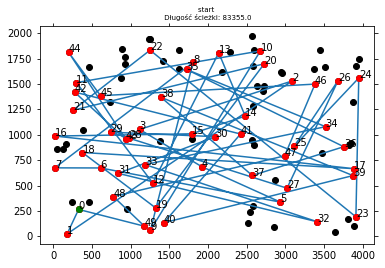

In [20]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[79, 30, 88, 41, 74, 96, 18, 25, 64, 69, 93, 83, 10, 59, 97, 22, 46, 62, 5, 92, 26, 11, 33, 28, 99, 13, 95, 29, 50, 57, 60, 68, 43, 49, 84, 67, 36, 4, 32, 81, 66, 48, 89, 52, 17, 23, 98, 37, 91, 7]
[79, 30, 88, 41, 74, 96, 18, 25, 64, 69, 93, 83, 10, 59, 97, 22, 46, 62, 5, 92, 26, 11, 33, 28, 99, 13, 95, 29, 50, 57, 60, 68, 43, 49, 84, 67, 36, 4, 32, 81, 66, 48, 89, 52, 17, 23, 98, 37, 91, 7]


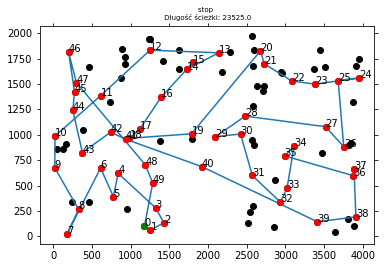

In [21]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [22]:
def find_lowest_cost_inner_steepest(possible_moves, path, distance_matrix):
    cost = 99999999999999
    swaps = ()
    for (swap1, swap2) in possible_moves:
        current_cost = calculate_edge_swap_cost((swap1, swap2), path, distance_matrix)
        if current_cost < cost:
            cost = current_cost
            swaps = (swap1, swap2)

    return cost, swaps


@timing
def inner_vertex_steepest(path, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves = create_combs(path)
        cost, swaps = find_lowest_cost_inner_steepest(
            possible_moves, path, distance_matrix
        )
        if cost < 0:
            swap1, swap2 = swaps
            swap_items_in_path((swap1, swap2), path)
            better = True

    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_vertex_steepest(path, distance_matrix2)

Elapsed time: 2.7982752323150635


[70, 21, 37, 71, 38, 82, 87, 23, 83, 89, 30, 84, 2, 90, 26, 22, 19, 16, 74, 60, 29, 8, 12, 99, 86, 43, 75, 96, 46, 5, 49, 61, 18, 44, 32, 11, 62, 78, 10, 79, 53, 47, 55, 93, 48, 35, 77, 31, 40, 25]
[70, 21, 37, 71, 38, 82, 87, 23, 83, 89, 30, 84, 2, 90, 26, 22, 19, 16, 74, 60, 29, 8, 12, 99, 86, 43, 75, 96, 46, 5, 49, 61, 18, 44, 32, 11, 62, 78, 10, 79, 53, 47, 55, 93, 48, 35, 77, 31, 40, 25]


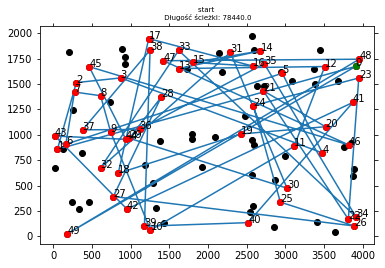

In [23]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[40, 2, 82, 86, 60, 83, 35, 23, 37, 48, 5, 46, 90, 22, 61, 19, 26, 11, 8, 84, 38, 77, 75, 32, 12, 43, 49, 53, 79, 30, 55, 62, 31, 44, 16, 10, 71, 89, 18, 74, 96, 25, 21, 93, 87, 78, 29, 47, 70, 99]
[40, 2, 82, 86, 60, 83, 35, 23, 37, 48, 5, 46, 90, 22, 61, 19, 26, 11, 8, 84, 38, 77, 75, 32, 12, 43, 49, 53, 79, 30, 55, 62, 31, 44, 16, 10, 71, 89, 18, 74, 96, 25, 21, 93, 87, 78, 29, 47, 70, 99]


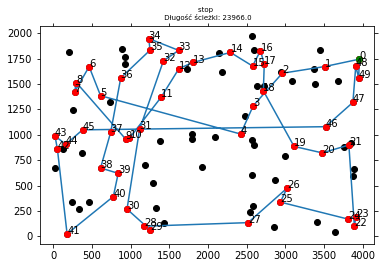

In [24]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [25]:
import itertools
def create_combs_between_two_lists(list1, list2):
    return list(itertools.product(list1, list2))

def calculate_edge_swap_cost_outer(swaps, path, distance_matrix):
    swap1, swap2, = swaps
    neighs = get_neighs(swap1, path)
    before_cost = edge_length(swap1, neighs, distance_matrix)
    after_cost = edge_length(swap2, neighs, distance_matrix)
    return after_cost - before_cost

def swap_item_value_in_list(swaps, path):
    swap1, swap2 = swaps
    index1 = path.index(swap1)
    path[index1]= swap2


In [26]:
@timing
def outer_vertex_greedy(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves = create_combs_between_two_lists(path, rest)
        random.shuffle(possible_moves)
        for (swap1, swap2) in possible_moves:
            cost = calculate_edge_swap_cost_outer((swap1, swap2), path, distance_matrix)
            if cost < 0:
                swap_item_value_in_list((swap1, swap2), path)
                swap_item_value_in_list((swap2, swap1), rest)
                better = True
                break
    print("stop", path)
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_greedy(path, rest, distance_matrix2)

stop [90, 97, 19, 54, 82, 33, 86, 92, 62, 5, 48, 0, 27, 56, 11, 26, 34, 85, 57, 66, 80, 24, 60, 76, 16, 14, 10, 44, 61, 6, 8, 68, 53, 63, 39, 1, 43, 84, 45, 2, 28, 29, 38, 49, 72, 50, 59, 22, 31, 46]
Elapsed time: 0.676386833190918


[30, 52, 86, 89, 12, 28, 90, 35, 53, 71, 91, 54, 0, 33, 82, 26, 68, 80, 14, 49, 42, 69, 43, 15, 31, 32, 79, 36, 34, 4, 2, 72, 75, 74, 56, 85, 67, 51, 38, 17, 13, 96, 97, 66, 21, 81, 88, 16, 48, 1]
[30, 52, 86, 89, 12, 28, 90, 35, 53, 71, 91, 54, 0, 33, 82, 26, 68, 80, 14, 49, 42, 69, 43, 15, 31, 32, 79, 36, 34, 4, 2, 72, 75, 74, 56, 85, 67, 51, 38, 17, 13, 96, 97, 66, 21, 81, 88, 16, 48, 1]


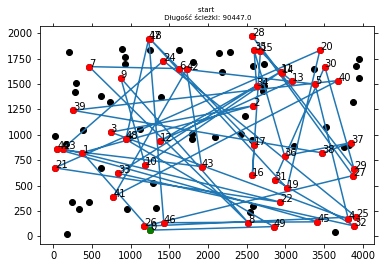

In [27]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[90, 97, 19, 54, 82, 33, 86, 92, 62, 5, 48, 0, 27, 56, 11, 26, 34, 85, 57, 66, 80, 24, 60, 76, 16, 14, 10, 44, 61, 6, 8, 68, 53, 63, 39, 1, 43, 84, 45, 2, 28, 29, 38, 49, 72, 50, 59, 22, 31, 46]
[90, 97, 19, 54, 82, 33, 86, 92, 62, 5, 48, 0, 27, 56, 11, 26, 34, 85, 57, 66, 80, 24, 60, 76, 16, 14, 10, 44, 61, 6, 8, 68, 53, 63, 39, 1, 43, 84, 45, 2, 28, 29, 38, 49, 72, 50, 59, 22, 31, 46]


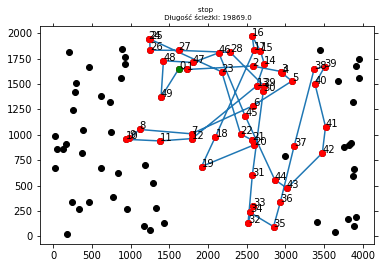

In [28]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [29]:
def edge_length_numpy(point, neighs, distance_matrix):
    new_length = distance_matrix[point, list(neighs)].sum()
    return new_length


def calculate_edge_swap_cost_outer_numpy(swaps, path, distance_matrix):
    (
        swap1,
        swap2,
    ) = swaps
    neighs = get_neighs(swap1, path)
    before_cost = edge_length_numpy(swap1, neighs, distance_matrix)
    # zwroc after_cost edges
    after_cost = edge_length_numpy(swap2, neighs, distance_matrix)
    return after_cost - before_cost


def find_lowest_cost_outer_steepest(possible_moves, path, distance_matrix):
    cost = 99999999999999
    swaps = ()
    for (swap1, swap2) in possible_moves:
        current_cost = calculate_edge_swap_cost_outer_numpy(
            (swap1, swap2), path, distance_matrix
        )
        if current_cost < cost:
            cost = current_cost
            swaps = (swap1, swap2)

    return cost, swaps


@timing
def outer_vertex_steepest(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves = create_combs_between_two_lists(path, rest)
        cost, swaps = find_lowest_cost_outer_steepest(
            possible_moves, path, distance_matrix
        )
        if cost < 0:
            swap1, swap2 = swaps
            swap_item_value_in_list((swap1, swap2), path)
            swap_item_value_in_list((swap2, swap1), rest)
            better = True
    print("stop", path)
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_steepest(path, rest, distance_matrix2)

stop [14, 22, 59, 56, 6, 8, 61, 76, 97, 58, 73, 71, 20, 10, 19, 54, 82, 86, 50, 57, 41, 30, 88, 63, 67, 84, 38, 95, 51, 77, 72, 68, 66, 62, 5, 91, 7, 27, 92, 0, 74, 96, 3, 18, 89, 9, 31, 90, 44, 16]
Elapsed time: 3.8013482093811035


[99, 66, 97, 56, 87, 12, 61, 93, 4, 55, 8, 73, 45, 5, 86, 54, 15, 27, 50, 41, 30, 0, 69, 74, 57, 59, 38, 79, 51, 76, 72, 17, 78, 22, 58, 91, 39, 6, 92, 35, 7, 88, 32, 64, 11, 83, 31, 90, 84, 46]
[99, 66, 97, 56, 87, 12, 61, 93, 4, 55, 8, 73, 45, 5, 86, 54, 15, 27, 50, 41, 30, 0, 69, 74, 57, 59, 38, 79, 51, 76, 72, 17, 78, 22, 58, 91, 39, 6, 92, 35, 7, 88, 32, 64, 11, 83, 31, 90, 84, 46]


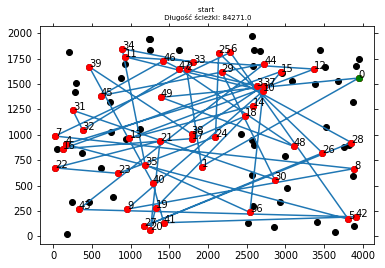

In [30]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[14, 22, 59, 56, 6, 8, 61, 76, 97, 58, 73, 71, 20, 10, 19, 54, 82, 86, 50, 57, 41, 30, 88, 63, 67, 84, 38, 95, 51, 77, 72, 68, 66, 62, 5, 91, 7, 27, 92, 0, 74, 96, 3, 18, 89, 9, 31, 90, 44, 16]
[14, 22, 59, 56, 6, 8, 61, 76, 97, 58, 73, 71, 20, 10, 19, 54, 82, 86, 50, 57, 41, 30, 88, 63, 67, 84, 38, 95, 51, 77, 72, 68, 66, 62, 5, 91, 7, 27, 92, 0, 74, 96, 3, 18, 89, 9, 31, 90, 44, 16]


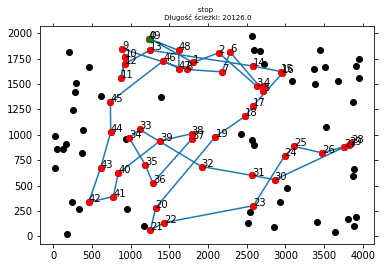

In [31]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [160]:


def edge_length_numpy(point, neigh, dm):
    new_length = dm[point, neigh].sum()
    return new_length


def get_edges(path):
    return [[path[d - 1], vertex] for d, vertex in enumerate(path)]


def get_edges_except(path):
    e = get_edges(path)
    return [
        item
        for item in itertools.combinations(e, 2)
        if len(set(itertools.chain(*item))) == 4
    ]


# print(get_edges([1,2,3]))


def swap_items_in_path(swaps, path):
    swap1, swap2 = swaps
    index1 = path.index(swap1)
    index2 = path.index(swap2)
    path[index1], path[index2] = path[index2], path[index1]


def reverse_part_of_list(swap1, swap2, path):
    index_swap1 = path.index(swap1)
    index_swap2 = path.index(swap2)
    ix_min = index_swap1 if index_swap1 < index_swap2 else index_swap2
    ix_max = index_swap1 if index_swap1 > index_swap2 else index_swap2
    path[int(ix_min + 1) : ix_max] = path[int(ix_min + 1) : ix_max][::-1]


def calculate_cost_edge_greedy(edge1, edge2, distance_matrix):
    swap1_0 = edge1[0]
    swap1_1 = edge1[1]
    swap2_0 = edge2[0]
    swap2_1 = edge2[1]
    edge1_length = edge_length_numpy(swap1_0, swap1_1, distance_matrix)
    edge2_length = edge_length_numpy(swap2_0, swap2_1, distance_matrix)
    new_edge1_length = edge_length_numpy(swap1_0, swap2_0, distance_matrix)
    new_edge2_length = edge_length_numpy(swap1_1, swap2_1, distance_matrix)
    # dodaj zwracanie new edges
    cost = new_edge1_length + new_edge2_length - edge1_length - edge2_length
    return cost, swap1_1, swap2_0


@timing
def inner_edge_greedy(path, distance_matrix):
    better = True
    start_path = path.copy()
    print("start", path)
    while better:
        better = False
        edges = get_edges_except(path)
        random.shuffle(edges)
        for (edge1, edge2) in edges:
            cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
                edge1, edge2, distance_matrix
            )

            if cost < 0:
                swap_items_in_path((swap1_1, swap2_0), path)
                reverse_part_of_list(swap1_1, swap2_0, path)
                better = True
                break

    print("stop", path)
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_edge_greedy(path, distance_matrix2)

start [28, 93, 60, 19, 56, 49, 29, 15, 79, 13, 67, 34, 26, 14, 84, 31, 24, 47, 36, 37, 21, 0, 48, 81, 12, 6, 87, 77, 43, 55, 70, 88, 78, 58, 92, 25, 38, 73, 7, 20, 40, 52, 59, 45, 96, 85, 90, 5, 10, 35]
stop [48, 5, 20, 73, 58, 14, 10, 31, 90, 59, 34, 85, 26, 19, 56, 6, 45, 28, 13, 70, 40, 47, 29, 77, 36, 12, 81, 43, 49, 38, 84, 67, 24, 60, 92, 0, 7, 88, 79, 55, 96, 25, 52, 78, 87, 15, 21, 93, 37, 35]
Elapsed time: 0.20307707786560059


[91, 99, 66, 70, 13, 81, 64, 57, 34, 45, 71, 86, 59, 2, 9, 82, 76, 21, 58, 56, 8, 18, 74, 41, 84, 0, 53, 15, 12, 63, 16, 17, 43, 4, 83, 14, 39, 32, 68, 29, 10, 1, 87, 73, 96, 79, 97, 55, 42, 92]
[91, 99, 66, 70, 13, 81, 64, 57, 34, 45, 71, 86, 59, 2, 9, 82, 76, 21, 58, 56, 8, 18, 74, 41, 84, 0, 53, 15, 12, 63, 16, 17, 43, 4, 83, 14, 39, 32, 68, 29, 10, 1, 87, 73, 96, 79, 97, 55, 42, 92]


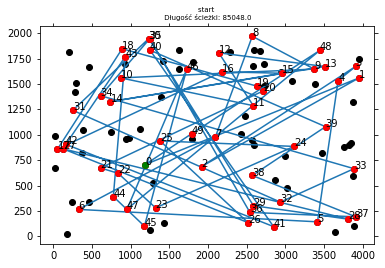

In [34]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[0, 91, 41, 79, 55, 96, 74, 18, 64, 21, 15, 87, 17, 83, 9, 71, 73, 58, 16, 14, 10, 97, 76, 59, 34, 82, 8, 56, 86, 43, 84, 45, 42, 2, 70, 99, 13, 29, 4, 32, 12, 81, 1, 53, 39, 63, 68, 57, 66, 92]
[0, 91, 41, 79, 55, 96, 74, 18, 64, 21, 15, 87, 17, 83, 9, 71, 73, 58, 16, 14, 10, 97, 76, 59, 34, 82, 8, 56, 86, 43, 84, 45, 42, 2, 70, 99, 13, 29, 4, 32, 12, 81, 1, 53, 39, 63, 68, 57, 66, 92]


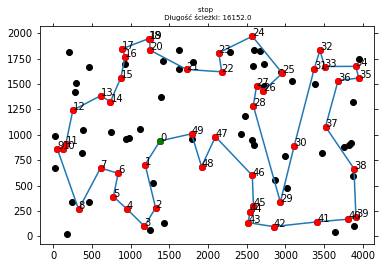

In [35]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [37]:

def find_lowest_cost_edge(edges, path, distance_matrix):
    cost = 99999999999999
    swaps = ()
    for (edge1, edge2) in edges:
        current_cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
            edge1, edge2, distance_matrix
        )
        if current_cost < cost:
            cost = current_cost
            swaps = (swap1_1, swap2_0)

    return cost, swaps


@timing
def inner_edge_steepest(path, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        edges = get_edges_except(path)
        cost, (swap1_1, swap2_0) = find_lowest_cost_edge(edges, path, distance_matrix)
        if cost < 0:
            swap_items_in_path((swap1_1, swap2_0), path)
            reverse_part_of_list(swap1_1, swap2_0, path)
            better = True

    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_edge_steepest(path, distance_matrix2)

Elapsed time: 1.4644863605499268


[30, 5, 62, 29, 85, 2, 88, 38, 11, 70, 54, 90, 13, 93, 94, 91, 79, 10, 96, 71, 22, 63, 28, 82, 16, 34, 73, 56, 92, 60, 37, 83, 7, 40, 98, 81, 57, 1, 74, 55, 27, 8, 78, 39, 36, 58, 47, 21, 59, 26]
[30, 5, 62, 29, 85, 2, 88, 38, 11, 70, 54, 90, 13, 93, 94, 91, 79, 10, 96, 71, 22, 63, 28, 82, 16, 34, 73, 56, 92, 60, 37, 83, 7, 40, 98, 81, 57, 1, 74, 55, 27, 8, 78, 39, 36, 58, 47, 21, 59, 26]


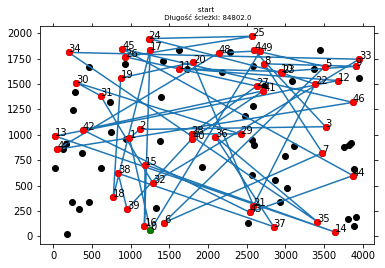

In [38]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[85, 34, 59, 22, 90, 10, 16, 58, 73, 71, 98, 37, 93, 21, 78, 83, 5, 62, 91, 74, 96, 55, 79, 30, 88, 7, 27, 92, 57, 60, 63, 39, 1, 81, 94, 36, 38, 29, 47, 70, 40, 13, 2, 28, 82, 54, 8, 56, 11, 26]
[85, 34, 59, 22, 90, 10, 16, 58, 73, 71, 98, 37, 93, 21, 78, 83, 5, 62, 91, 74, 96, 55, 79, 30, 88, 7, 27, 92, 57, 60, 63, 39, 1, 81, 94, 36, 38, 29, 47, 70, 40, 13, 2, 28, 82, 54, 8, 56, 11, 26]


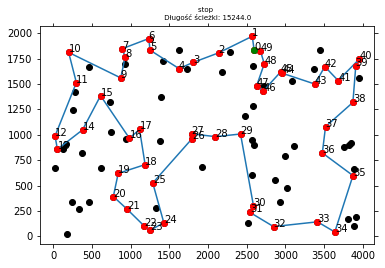

In [39]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [40]:
@timing
def hehe(num):
    for _ in range(num):
        pass
    return [1, 2]


hehe(100000)

Elapsed time: 0.0016140937805175781


(1, 2, 0.0016140937805175781)

In [41]:
# inner_and_outer_vertex_greedy greedy
@timing
def inner_and_outer_vertex_greedy(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves_inner = create_combs(path)
        possible_moves_outer = create_combs_between_two_lists(path, rest)
        all_combined = possible_moves_inner + possible_moves_outer
        random.shuffle(all_combined)

        for item in all_combined:
            if item in possible_moves_inner:
                (swap1, swap2) = item
                cost = calculate_edge_swap_cost((swap1, swap2), path, distance_matrix)
                if cost < 0:
                    swap_items_in_path((swap1, swap2), path)
                    better = True
                    break
            if item in possible_moves_outer:
                (swap1, swap2) = item
                cost = calculate_edge_swap_cost_outer(
                    (swap1, swap2), path, distance_matrix
                )
                if cost < 0:
                    swap_item_value_in_list((swap1, swap2), path)
                    swap_item_value_in_list((swap2, swap1), rest)
                    better = True
                    break
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_and_outer_vertex_greedy(
    path, rest, distance_matrix2
)

Elapsed time: 4.0452916622161865


[21, 87, 80, 86, 43, 58, 62, 89, 28, 16, 90, 34, 42, 44, 13, 67, 83, 79, 23, 71, 41, 3, 6, 11, 39, 66, 56, 72, 82, 26, 63, 27, 75, 54, 60, 64, 95, 74, 73, 20, 97, 38, 65, 36, 55, 30, 17, 14, 92, 2]
[21, 87, 80, 86, 43, 58, 62, 89, 28, 16, 90, 34, 42, 44, 13, 67, 83, 79, 23, 71, 41, 3, 6, 11, 39, 66, 56, 72, 82, 26, 63, 27, 75, 54, 60, 64, 95, 74, 73, 20, 97, 38, 65, 36, 55, 30, 17, 14, 92, 2]


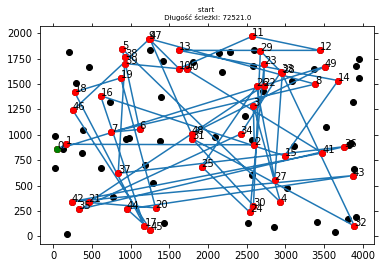

In [42]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[23, 37, 58, 16, 14, 10, 31, 90, 97, 22, 59, 61, 85, 19, 50, 60, 57, 92, 27, 80, 24, 86, 8, 6, 56, 11, 54, 82, 33, 67, 49, 72, 68, 0, 62, 20, 73, 71, 83, 9, 48, 5, 91, 7, 55, 96, 52, 15, 87, 17]
[23, 37, 58, 16, 14, 10, 31, 90, 97, 22, 59, 61, 85, 19, 50, 60, 57, 92, 27, 80, 24, 86, 8, 6, 56, 11, 54, 82, 33, 67, 49, 72, 68, 0, 62, 20, 73, 71, 83, 9, 48, 5, 91, 7, 55, 96, 52, 15, 87, 17]


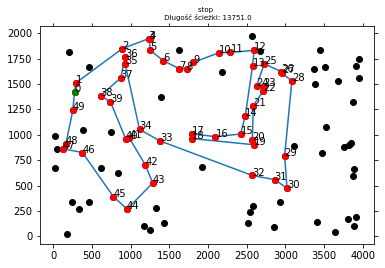

In [43]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

# inner_and_outer_vertex_steepest steepest
@timing
def inner_and_outer_vertex_steepest(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        choice = random.getrandbits(1)

        if choice == 0:
            possible_moves = create_combs(path)
            cost, swaps = find_lowest_cost(possible_moves, path, distance_matrix)
            if cost < 0:
                swap1, swap2 = swaps
                swap_items_in_path((swap1, swap2), path)
                better = True
        if choice == 1:
            possible_moves = create_combs_between_two_lists(path, rest)
            cost, swaps = find_lowest_cost(possible_moves, path, distance_matrix)
            if cost < 0:
                swap1, swap2 = swaps
                swap_item_value_in_list((swap1, swap2), path)
                swap_item_value_in_list((swap2, swap1), rest)
                better = True

    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_and_outer_vertex_steepest(
    path, rest, distance_matrix2
)

In [44]:
# inner_and_outer_vertex_steepest steepest
@timing
def inner_and_outer_vertex_steepest(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves_inner = create_combs(path)
        cost_inner, swaps_inner = find_lowest_cost_inner_steepest(
            possible_moves_inner, path, distance_matrix
        )

        possible_moves_outer = create_combs_between_two_lists(path, rest)
        cost_outer, swaps_outer = find_lowest_cost_outer_steepest(
            possible_moves_outer, path, distance_matrix
        )

        if cost_inner < cost_outer and cost_inner < 0:
            swap1, swap2 = swaps_inner
            swap_items_in_path((swap1, swap2), path)
            better = True

        if cost_outer <= cost_inner and cost_outer < 0:
            swap1, swap2 = swaps_outer
            swap_item_value_in_list((swap1, swap2), path)
            swap_item_value_in_list((swap2, swap1), rest)
            better = True

    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_and_outer_vertex_steepest(
    path, rest, distance_matrix2
)

Elapsed time: 7.800373792648315


[31, 65, 33, 35, 27, 54, 47, 1, 84, 17, 73, 59, 23, 66, 45, 29, 97, 2, 92, 60, 86, 19, 67, 85, 43, 30, 64, 50, 82, 63, 48, 68, 20, 51, 42, 37, 57, 6, 7, 74, 13, 75, 55, 32, 44, 0, 98, 26, 71, 88]
[31, 65, 33, 35, 27, 54, 47, 1, 84, 17, 73, 59, 23, 66, 45, 29, 97, 2, 92, 60, 86, 19, 67, 85, 43, 30, 64, 50, 82, 63, 48, 68, 20, 51, 42, 37, 57, 6, 7, 74, 13, 75, 55, 32, 44, 0, 98, 26, 71, 88]


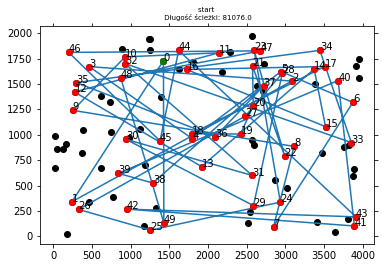

In [45]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[18, 74, 91, 0, 27, 92, 90, 22, 97, 59, 61, 85, 26, 54, 45, 28, 84, 80, 24, 50, 86, 56, 19, 66, 41, 30, 88, 39, 63, 43, 81, 12, 32, 36, 29, 33, 82, 6, 8, 60, 57, 46, 71, 20, 73, 35, 37, 23, 17, 78]
[18, 74, 91, 0, 27, 92, 90, 22, 97, 59, 61, 85, 26, 54, 45, 28, 84, 80, 24, 50, 86, 56, 19, 66, 41, 30, 88, 39, 63, 43, 81, 12, 32, 36, 29, 33, 82, 6, 8, 60, 57, 46, 71, 20, 73, 35, 37, 23, 17, 78]


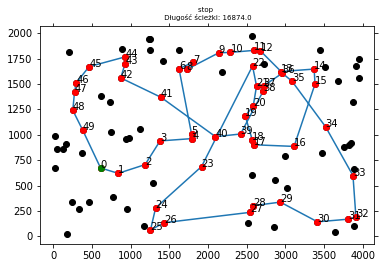

In [46]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

# outer vertex inner edge
@timing
def outer_vertex_inner_edge_greedy(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        choice = random.getrandbits(1)

        if choice == 0:
            possible_moves = create_combs_between_two_lists(path, rest)
            random.shuffle(possible_moves)
            for (swap1, swap2) in possible_moves:
                cost = calculate_edge_swap_cost_outer(
                    (swap1, swap2), path, distance_matrix
                )
                if cost < 0:
                    swap_item_value_in_list((swap1, swap2), path)
                    swap_item_value_in_list((swap2, swap1), rest)
                    better = True
                    break
        if choice == 1:
            edges = get_edges_except(path)
            random.shuffle(edges)
            for (edge1, edge2) in edges:
                cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
                    edge1, edge2, distance_matrix
                )

                if cost < 0:
                    swap_items_in_path((swap1_1, swap2_0), path)
                    reverse_part_of_list(swap1_1, swap2_0, path)
                    better = True
                    break
    return start_path, path


print()
e = [([4, 1], [2, 3])]
z = get_edges_except([1, 2, 3, 4])[0]
if (4, 1) in e:
    print(z)
path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_inner_edge_greedy(
    path, rest, distance_matrix2
)

In [47]:
# outer vertex inner edge
@timing
def outer_vertex_inner_edge_greedy(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False

        possible_moves = create_combs_between_two_lists(path, rest)
        edges = get_edges_except(path)
        all_combined = possible_moves + edges
        random.shuffle(all_combined)

        for item in all_combined:
            if item in possible_moves:
                (swap1, swap2) = item
                cost = calculate_edge_swap_cost_outer(
                    (swap1, swap2), path, distance_matrix
                )
                if cost < 0:
                    swap_item_value_in_list((swap1, swap2), path)
                    swap_item_value_in_list((swap2, swap1), rest)
                    better = True
                    break
            if item in edges:
                (edge1, edge2) = item
                cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
                    edge1, edge2, distance_matrix
                )

                if cost < 0:
                    swap_items_in_path((swap1_1, swap2_0), path)
                    reverse_part_of_list(swap1_1, swap2_0, path)
                    better = True
                    break

    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_inner_edge_greedy(
    path, rest, distance_matrix2
)

Elapsed time: 4.3579795360565186


[47, 87, 45, 1, 52, 20, 96, 51, 74, 76, 92, 91, 5, 69, 17, 53, 15, 43, 62, 42, 28, 38, 86, 0, 56, 61, 50, 79, 46, 10, 27, 35, 60, 64, 41, 58, 95, 25, 84, 44, 34, 93, 65, 72, 3, 2, 49, 54, 82, 80]
[47, 87, 45, 1, 52, 20, 96, 51, 74, 76, 92, 91, 5, 69, 17, 53, 15, 43, 62, 42, 28, 38, 86, 0, 56, 61, 50, 79, 46, 10, 27, 35, 60, 64, 41, 58, 95, 25, 84, 44, 34, 93, 65, 72, 3, 2, 49, 54, 82, 80]


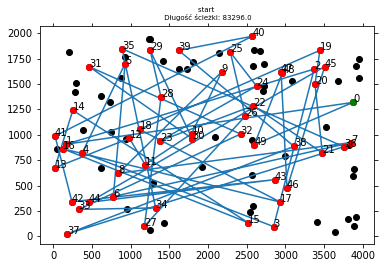

In [48]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[85, 34, 61, 59, 22, 97, 90, 31, 10, 14, 16, 73, 20, 71, 9, 83, 78, 87, 15, 52, 48, 5, 0, 92, 27, 91, 7, 41, 30, 88, 39, 63, 68, 80, 24, 60, 50, 86, 56, 8, 6, 33, 28, 2, 42, 45, 82, 54, 11, 26]
[85, 34, 61, 59, 22, 97, 90, 31, 10, 14, 16, 73, 20, 71, 9, 83, 78, 87, 15, 52, 48, 5, 0, 92, 27, 91, 7, 41, 30, 88, 39, 63, 68, 80, 24, 60, 50, 86, 56, 8, 6, 33, 28, 2, 42, 45, 82, 54, 11, 26]


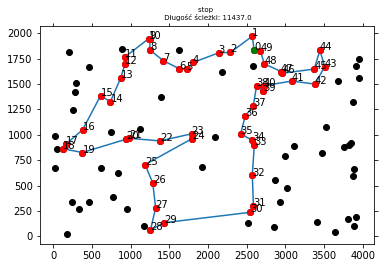

In [49]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [50]:
# outer vertex inner edge
@timing
def outer_vertex_inner_edge_steepest(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves_outer = create_combs_between_two_lists(path, rest)
        cost_outer, swaps_outer = find_lowest_cost_outer_steepest(possible_moves_outer, path, distance_matrix)
        
        edges = get_edges_except(path)
        cost_edges, swaps_edge  = find_lowest_cost_edge(
            edges, path, distance_matrix
        )
            
        if cost_outer < cost_edges and cost_outer < 0:
            swap1, swap2 = swaps_outer
            swap_item_value_in_list((swap1, swap2), path)
            swap_item_value_in_list((swap2, swap1), rest)
            better = True
            
        if cost_edges <= cost_outer and cost_edges < 0:
            (swap1_1, swap2_0) = swaps_edge
            swap_items_in_path((swap1_1, swap2_0), path)
            reverse_part_of_list(swap1_1, swap2_0, path)
            better = True
            
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_inner_edge_steepest(
    path, rest, distance_matrix2
)


Elapsed time: 7.118757963180542


[98, 60, 75, 31, 23, 47, 20, 53, 93, 80, 18, 13, 10, 79, 40, 81, 9, 66, 16, 28, 90, 96, 87, 77, 48, 64, 99, 41, 89, 30, 39, 62, 57, 76, 7, 52, 83, 55, 34, 38, 59, 65, 33, 54, 19, 35, 0, 5, 26, 95]
[98, 60, 75, 31, 23, 47, 20, 53, 93, 80, 18, 13, 10, 79, 40, 81, 9, 66, 16, 28, 90, 96, 87, 77, 48, 64, 99, 41, 89, 30, 39, 62, 57, 76, 7, 52, 83, 55, 34, 38, 59, 65, 33, 54, 19, 35, 0, 5, 26, 95]


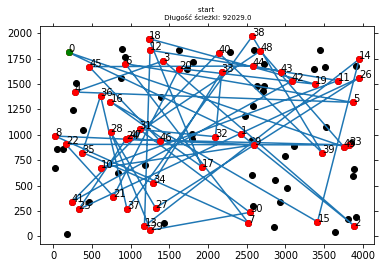

In [51]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[77, 51, 13, 2, 45, 82, 54, 11, 26, 85, 61, 59, 44, 14, 16, 73, 20, 71, 9, 83, 35, 37, 23, 17, 87, 15, 52, 89, 48, 5, 62, 91, 79, 30, 88, 41, 7, 0, 92, 27, 66, 57, 60, 50, 24, 80, 67, 84, 38, 95]
[77, 51, 13, 2, 45, 82, 54, 11, 26, 85, 61, 59, 44, 14, 16, 73, 20, 71, 9, 83, 35, 37, 23, 17, 87, 15, 52, 89, 48, 5, 62, 91, 79, 30, 88, 41, 7, 0, 92, 27, 66, 57, 60, 50, 24, 80, 67, 84, 38, 95]


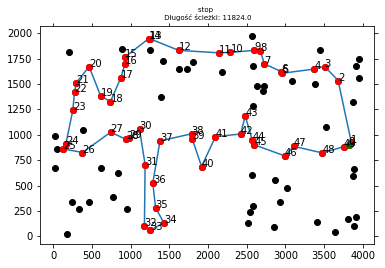

In [52]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [53]:
@timing
def random_solution(path, time, distance_matrix):
    from datetime import datetime, timedelta

    to_return = []
    path_len = 999999999999999
    end_time = datetime.now() + timedelta(seconds=time)
    while datetime.now() < end_time:
        full_path = path + [path[0]]
        curr_len = calculate_path_length(full_path, distance_matrix)
        if curr_len < path_len:
            path_len = curr_len
            to_return = path
        random.shuffle(path)

    return to_return, path_len

# with open("paths.txt", "r") as file:
#     data = file.readlines()


# def testtest(program, time, title):
#     final_scores = []

#     for ix, items in enumerate(data):
#         path = [int(item) for item in items.split()]
#         lat, lon = get_lat_lon_from_url(target_url=target_url_krob100)
#         distance_matrix = calc_matrix(lat, lon)
#         stop_path, lengh, diff = program(path, time, distance_matrix)
#         final_path = stop_path + [stop_path[0]]
#         path_len = calculate_path_length(final_path, distance_matrix)

#         scores = [diff, path_len, final_path]
#         final_scores.append(scores)
#     df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath"])
#     df["Time"] = df["Time"].astype("float")
#     df["PathLen"] = df["PathLen"].astype("float")
#     df["FinalPath"] = df["FinalPath"].astype("object")
#     display(df)
#     display(df.describe())
#     df.to_csv(title)
#     return True

# testtest(random_solution, 4.61, "randomsolb")
# c = pd.read_csv("randomsolb")
# display(c[c["PathLen"] == c["PathLen"].min()])
# display(c.describe())
with open("paths.txt", "r") as file:
    data = file.readlines()


def test(program, title):
    final_scores = []

    for ix, items in enumerate(data):
        path = [int(item) for item in items.split()]
        rest = list(set([i for i in range(100)]) - set(path))
        print(ix, path)
        lat, lon = get_lat_lon_from_url(target_url=target_url_krob100)
        distance_matrix = calc_matrix(lat, lon)
        distance_matrix2 = distance_matrix.to_numpy()
        start_path, stop_path, diff = program(path, rest, distance_matrix2)
        final_path = stop_path + [stop_path[0]]
        path_len = calculate_path_length(final_path, distance_matrix)
        scores = [diff, path_len, final_path]
        final_scores.append(scores)
    df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath"])
    df["Time"] = df["Time"].astype("float")
    df["PathLen"] = df["PathLen"].astype("float")
    df["FinalPath"] = df["FinalPath"].astype("object")
    display(df)
    display(df.describe())
    df.to_csv(title)
    return True


kroa
test(inner_and_outer_vertex_steepest, "test")
test(outer_vertex_inner_edge_steepest, "outer_vertex_inner_edge_steepestkrob")
test(inner_and_outer_vertex_steepest, "inner_and_outer_vertex_steepestkrob")
test(inner_and_outer_vertex_greedy, "inner_and_outer_vertex_greedykrob")
test(outer_vertex_inner_edge_greedy, "outer_vertex_inner_edge_greedykrob")
c = pd.read_csv("inner_and_outer_vertex_greedykrob")


In [54]:
import operator
from itertools import chain

def create_steepest_ranking_outer_vertex(possible_moves_outer, path,rest, distance_matrix):
    ranking = []
    for (swap1, swap2) in possible_moves_outer:
        current_cost = calculate_edge_swap_cost_outer_numpy(
            (swap1, swap2), path, distance_matrix
        )
        if current_cost < 0:
            p = get_neighs(swap1, path)
            r = get_neighs(swap2,rest)
            n = [p, r, (swap1, swap2)]
            to_delete = list(set(list(chain(*n))))
            l = ["vertex", (swap1, swap2), current_cost, to_delete]
            ranking.append(l)

    return ranking

def create_steepest_ranking_edge(edges, path, distance_matrix):
    ranking = []
    for (edge1, edge2) in edges:
        current_cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
            edge1, edge2, distance_matrix
        )
        if current_cost < 0:
            a = get_neighs(edge1[0], path)
            b = get_neighs(edge1[1], path)
            c = get_neighs(edge2[0], path)
            d = get_neighs(edge2[1], path)
            n = [a,b,c,d]
            to_delete = list(set(list(chain(*n))))
            l = ["edge", (swap1_1, swap2_0), current_cost, to_delete]
            ranking.append(l)

    return ranking


# outer vertex inner edge
@timing
def new_outer_vertex_inner_edge_steepest(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    
    whole_ranking = []
    while better:
        better = False
        possible_moves_outer = create_combs_between_two_lists(path, rest)        
        edges = get_edges_except(path)
        
        existing_moves_vertex = [item[1] for item in whole_ranking if item[0] == "vertex"]
        existing_moves_edge = [item[1] for item in whole_ranking if item[0] == "edge"]
        
        new_possible_moves_outer = [item for item in possible_moves_outer if item not in existing_moves_vertex]
        new_edges = [item for item in edges if item not in existing_moves_edge]
        
        vertex_ranking = create_steepest_ranking_outer_vertex(new_possible_moves_outer, path, rest, distance_matrix)
        edge_ranking = create_steepest_ranking_edge(new_edges, path, distance_matrix)
        
        whole_ranking += vertex_ranking
        whole_ranking += edge_ranking
        whole_ranking = sorted(whole_ranking, key=operator.itemgetter(2))   
        
        if len(whole_ranking) > 0:
            _type, swaps, cost, to_delete = whole_ranking[0]

            if _type == "vertex":
                swap1, swap2 = swaps
                swap_item_value_in_list((swap1, swap2), path)
                swap_item_value_in_list((swap2, swap1), rest)
                better = True

            if _type == "edge":
                (swap1_1, swap2_0) = swaps
                swap_items_in_path((swap1_1, swap2_0), path)
                reverse_part_of_list(swap1_1, swap2_0, path)
                better = True

            temp = whole_ranking.copy()
            for ix, items in enumerate(whole_ranking):
                for check in items[1]:
                    if check in to_delete:
                        temp.remove(items)
                        break
        
            whole_ranking = temp
        
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = new_outer_vertex_inner_edge_steepest(
    path, rest, distance_matrix2
)


Elapsed time: 6.751265048980713


[88, 40, 58, 72, 2, 68, 73, 99, 56, 35, 9, 91, 18, 17, 28, 60, 31, 23, 52, 0, 84, 14, 12, 64, 76, 79, 5, 53, 74, 21, 7, 97, 87, 27, 38, 37, 70, 55, 42, 4, 85, 71, 82, 61, 90, 69, 22, 34, 67, 29]
[88, 40, 58, 72, 2, 68, 73, 99, 56, 35, 9, 91, 18, 17, 28, 60, 31, 23, 52, 0, 84, 14, 12, 64, 76, 79, 5, 53, 74, 21, 7, 97, 87, 27, 38, 37, 70, 55, 42, 4, 85, 71, 82, 61, 90, 69, 22, 34, 67, 29]


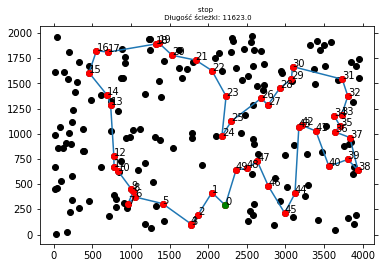

In [55]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

Elapsed time: 5.617381572723389
[61, 49, 94, 90, 22, 34, 79, 64, 12, 14, 84, 0, 52, 39, 11, 17, 28, 36, 15, 50, 62, 43, 83, 51, 10, 44, 32, 99, 56, 35, 9, 91, 98, 13, 68, 58, 88, 20, 69, 93, 85, 70, 37, 27, 97, 33, 89, 7, 21, 82]
[61, 49, 94, 90, 22, 34, 79, 64, 12, 14, 84, 0, 52, 39, 11, 17, 28, 36, 15, 50, 62, 43, 83, 51, 10, 44, 32, 99, 56, 35, 9, 91, 98, 13, 68, 58, 88, 20, 69, 93, 85, 70, 37, 27, 97, 33, 89, 7, 21, 82]


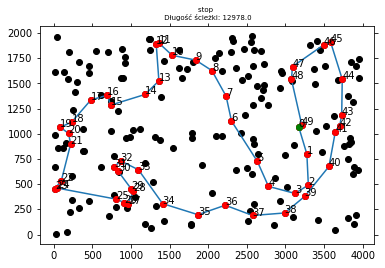

In [56]:
path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_inner_edge_steepest(
    path, rest, distance_matrix2
)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

def find_n_closest_neigh(neigh, distance_matrix, k):
    return np.argsort(distance_matrix[:, neigh])[:k]


def get_new_edges_after_vertex_swap(swaps, path):
    (
        swap1,
        swap2,
    ) = swaps
    neighs = get_neighs(swap1, path)
    return [(swap2, neighs[0]), (swap2, neighs[1])]


def get_new_edges_after_edges_swap(swaps):
    edge1, edge2 = swaps
    swap1_0 = edge1[0]
    swap1_1 = edge1[1]
    swap2_0 = edge2[0]
    swap2_1 = edge2[1]
    return [(swap1_0, swap2_0), (swap1_1, swap2_1)]


@timing
def candidate_moves(path, rest, distance_matrix):
    better = True
    start_path = path.copy()

    while better:
        better = False
        possible_moves_outer = create_combs_between_two_lists(path, rest)
        edges = get_edges_except(path)

        possible_moves_outer_new_edges_created = list(
            itertools.chain(
                *[
                    get_new_edges_after_vertex_swap(item, path)
                    for item in possible_moves_outer
                ]
            )
        )
        edges_new_edges_created = list(
            itertools.chain(*[get_new_edges_after_edges_swap(item) for item in edges])
        )

        candidates = []
        for n1 in range(200):
            for n2 in find_n_closest_neigh(n1, distance_matrix, 5):
                if (n1, n2) in edges_new_edges_created:
                    ix = int(edges_new_edges_created.index((n1, n2)) / 2)
                    e = edges[ix]
                    cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
                        e[0], e[1], distance_matrix
                    )
                    if cost < 0:
                        c = ["edge", (swap1_1, swap2_0), cost]
                        candidates.append(c)
                if (n1, n2) in possible_moves_outer_new_edges_created:
                    ix = int(possible_moves_outer_new_edges_created.index((n1, n2)) / 2)
                    e = possible_moves_outer[ix]
                    cost = calculate_edge_swap_cost_outer_numpy(
                        e, path, distance_matrix
                    )
                    if cost < 0:
                        c = ["vertex", e, cost]
                        candidates.append(c)

        candidates = sorted(candidates, key=operator.itemgetter(2))
        if len(candidates) > 0:
            _type, swaps, cost = candidates[0]

            if _type == "vertex":
                swap1, swap2 = swaps
                swap_item_value_in_list((swap1, swap2), path)
                swap_item_value_in_list((swap2, swap1), rest)
                better = True

            if _type == "edge":
                (swap1_1, swap2_0) = swaps
                swap_items_in_path((swap1_1, swap2_0), path)
                reverse_part_of_list(swap1_1, swap2_0, path)
                better = True

    return start_path, path


def create_random_vertexes2(number_of_samples):
    l = [int(i) for i in range(0, 200)]
    random.shuffle(l)
    vertexes = l[:number_of_samples]
    rest = l[number_of_samples:]
    return vertexes, rest


path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = candidate_moves(path, rest, distance_matrix2)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_inner_edge_steepest(
    path, rest, distance_matrix2
)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

path, rest = create_random_vertexes2(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = new_outer_vertex_inner_edge_steepest(
    path, rest, distance_matrix2
)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

Elapsed time: 0.0
[34, 1, 180, 124, 160, 79, 150, 186, 5, 108, 106, 156, 46, 30, 66, 161, 63, 19, 54, 41, 134, 185, 126, 111, 119, 154, 182, 21, 133, 7, 74, 53, 61, 82, 71, 129, 70, 37, 27, 38, 87, 147, 199, 170, 57, 140, 97, 113, 102, 145, 128, 142, 89, 33, 24, 16, 184, 167, 172, 22, 143, 69, 75, 90, 149, 93, 94, 49, 138, 85, 4, 104, 42, 136, 177, 151, 55, 195, 132, 175, 112, 194, 181, 101, 20, 139, 163, 153, 88, 40, 58, 2, 72, 188, 68, 141, 130, 179, 155, 99, 34]
[34, 1, 180, 124, 160, 79, 150, 186, 5, 108, 106, 156, 46, 30, 66, 161, 63, 19, 54, 41, 134, 185, 126, 111, 119, 154, 182, 21, 133, 7, 74, 53, 61, 82, 71, 129, 70, 37, 27, 38, 87, 147, 199, 170, 57, 140, 97, 113, 102, 145, 128, 142, 89, 33, 24, 16, 184, 167, 172, 22, 143, 69, 75, 90, 149, 93, 94, 49, 138, 85, 4, 104, 42, 136, 177, 151, 55, 195, 132, 175, 112, 194, 181, 101, 20, 139, 163, 153, 88, 40, 58, 2, 72, 188, 68, 141, 130, 179, 155, 99, 34]


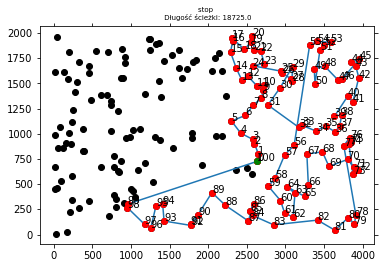

In [59]:
import random

def new_get_clossest_points(distance_matrix, idx):
    num = round(0.5 * distance_matrix.shape[0] - 1)
    return np.argsort(distance_matrix[:, idx])[:num]

@timing
def new_tsp_nn(d, selected_vertex=None):
    if selected_vertex is None:
        selected_vertex = random.randint(0, 199)

    tsp_outcome = [selected_vertex]
    
    for _ in range(int((d.shape[0] / 2) - 1)):
        
        # find minimum in column
        ix_min = int(np.argmin(d[:,selected_vertex]))
        
        # push min to outcome
        tsp_outcome.append(ix_min)
#         test_display.append(tsp_outcome.copy())
        # set distance to 0
        
        d[:, selected_vertex] = np.inf
        d[selected_vertex] = np.inf
        # set vertex as ix_min
        selected_vertex = ix_min

    tsp_outcome.append(tsp_outcome[0])
#     test_display[-1].append(test_display[-1][0])
    return tsp_outcome, 1

path, rest = create_random_vertexes2(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = new_tsp_nn(
distance_matrix2
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot(start_path, lat, lon, "stop", distance_matrix)


In [263]:
paths = []
for _ in range(100):
    path, _ = create_random_vertexes2(100)
    if path not in paths:
        paths.append(path)

with open("paths.txt", "w") as file:
    for line in paths[:100]:
        file.write(" ".join([str(i) for i in line]))
        file.write("\n")

In [ ]:
with open("paths.txt", "r") as file:
    data = file.readlines()


def testzad1(title):
    final_scores = []

    for _ in range(50):
        lat, lon = get_lat_lon_from_url(target_url_krob200)
        distance_matrix = calc_matrix(lat, lon)
        d = distance_matrix.to_numpy()
        #         start = time()
        tsp, d, time = new_tsp_nn(d)
        #         end = time()
        #         diff = end - start
        #         print(tsp)
        final_path = tsp
        distance_matrix = calc_matrix(lat, lon)
        #         display(distance_matrix)
        path_len = calculate_path_length(final_path, distance_matrix)
        scores = [time, path_len, final_path]
        final_scores.append(scores)

    df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath"])
    df["Time"] = df["Time"].astype("float")
    df["PathLen"] = df["PathLen"].astype("float")
    df["FinalPath"] = df["FinalPath"].astype("object")
    display(df)
    display(df.describe())
    df.to_csv(title)


def test(program, title):
    final_scores = []

    for ix, items in enumerate(data[:5]):
        path = [int(item) for item in items.split()]
        rest = list(set([i for i in range(100)]) - set(path))
        print(ix, path)
        lat, lon = get_lat_lon_from_url(target_url=target_url_krob200)
        distance_matrix = calc_matrix(lat, lon)
        distance_matrix2 = distance_matrix.to_numpy()
        start_path, stop_path, diff = program(path, rest, distance_matrix2)
        final_path = stop_path + [stop_path[0]]
        path_len = calculate_path_length(final_path, distance_matrix)
        scores = [diff, path_len, final_path]
        final_scores.append(scores)
    df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath"])
    df["Time"] = df["Time"].astype("float")
    df["PathLen"] = df["PathLen"].astype("float")
    df["FinalPath"] = df["FinalPath"].astype("object")
    display(df)
    display(df.describe())
    df.to_csv(title)
    return True


# testzad1("new_tsp_nnkrob200")
# test(outer_vertex_inner_edge_steepest, "outer_vertex_inner_edge_steepestkrob200")
# test(outer_vertex_inner_edge_steepest, "outer_vertex_inner_edge_steepestkrob200")
# test(
#     new_outer_vertex_inner_edge_steepest, "new_outer_vertex_inner_edge_steepestkroa200"
# )
# test(candidate_moves, "candidate_moveskrob200")

In [ ]:
c = pd.read_csv("candidate_moveskrob200")
print(c.describe())
nn = c.loc[c["PathLen"] == c["PathLen"].min()]
print(nn)
print()
lat, lon = get_lat_lon_from_url(target_url=target_url_krob200)
distance_matrix = calc_matrix(lat, lon)
l = nn.FinalPath.to_list()[0]
new = l.replace(",", " ")
new = new[1:-1]
ne = new.split()
p = [int(i) for i in ne]
create_plot(
    p,
    lat,
    lon,
    "Algorytm stromy ruchy kandydackie - krob200",
    distance_matrix,
)

# LAB 4

In [87]:
def create_random_vertexes2(number_of_samples):
    l = [int(i) for i in range(0, 200)]
    random.shuffle(l)
    vertexes = l[:number_of_samples]
    rest = l[number_of_samples:]
    return vertexes, rest

In [103]:
#candidate
def find_n_closest_neigh(neigh, distance_matrix, k):
    return np.argsort(distance_matrix[:, neigh])[:k]

def my_neighs(item, path):
    left_neigh = path[path.index(item) - 1]
    right_neigh = (
        path[path.index(item) + 1] if (path.index(item) + 1) < len(path) else path[0]
    )
    return left_neigh, right_neigh


def outer_vertex_swap_cost(swaps, path, distance_matrix):
    current_cost = calculate_edge_swap_cost_outer_numpy(
            swaps, path, distance_matrix
        )
    return current_cost, swaps

def edge_swap_cost_cands(e, distance_matrix):
    edge1 = e[0]
    edge2 = e[1]
    swap1_0 = edge1[0]
    swap1_1 = edge1[1]
    swap2_0 = edge2[0]
    swap2_1 = edge2[1]
    edge1_length = edge_length_numpy(swap1_0, swap1_1, distance_matrix)
    edge2_length = edge_length_numpy(swap2_0, swap2_1, distance_matrix)
    new_edge1_length = edge_length_numpy(swap1_0, swap2_0, distance_matrix)
    new_edge2_length = edge_length_numpy(swap1_1, swap2_1, distance_matrix)
    cost = new_edge1_length + new_edge2_length - edge1_length - edge2_length
    return cost, (swap1_1, swap2_0)

@timing
def cands(path, rest, distance_matrix, n_cands = 5, shuffle = False):
    start_path = path.copy()
    neigh_info = dict()
    for i in range(0, len(distance_matrix)):
        neigh_info[i] = list(find_n_closest_neigh(i, distance_matrix, n_cands))
    
    shuffled_list = path.copy()
    if shuffle:
        random.shuffle(shuffled_list)
    
    
    for v1 in shuffled_list:
        v1_left_neigh, v1_right_neigh = my_neighs(v1, path)
        moves = []

        for v2 in neigh_info[v1]:            
            if v2 in path:
                v2_left_neigh, v2_right_neigh = my_neighs(v2, path)
                moves.append(["E", ([v1,v1_right_neigh], [v2,v2_right_neigh])])
                moves.append(["E",([v1_left_neigh,v1], [v2_left_neigh,v2])])
            else:
                moves.append(["V", (v1_left_neigh,v2)])
                moves.append(["V", (v1_right_neigh,v2)])
    

        whole_ranking = []
        for move in moves:
            if move[0] == "V":
                whole_ranking.append(["V", *outer_vertex_swap_cost(move[1], path, distance_matrix)])
            if move[0] == "E":
                whole_ranking.append(["E",*edge_swap_cost_cands(move[1], distance_matrix)])
        print(whole_ranking)
        whole_ranking = sorted(whole_ranking, key=operator.itemgetter(1))  
        print(whole_ranking[0])
        _type, cost, swaps = whole_ranking[0]
        if cost < 0:
            if _type == "V":
                swap1, swap2 = swaps
                swap_item_value_in_list((swap1, swap2), path)
                swap_item_value_in_list((swap2, swap1), rest)
                better = True

            if _type == "E":
                (swap1_1, swap2_0) = swaps
                swap_items_in_path((swap1_1, swap2_0), path)
                reverse_part_of_list(swap1_1, swap2_0, path)
            
    return start_path, path
path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = cands(
path, rest, distance_matrix2
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot(start_path, lat, lon, "stop", distance_matrix)

[['V', -1480.0, (25, 78)], ['V', -1285.0, (67, 78)], ['E', -1003.0, (67, 161)], ['E', -954.0, (159, 166)], ['E', -977.0, (67, 176)], ['E', -2375.0, (159, 189)], ['E', -1561.0, (67, 12)], ['E', 109.0, (159, 113)], ['E', -1657.0, (67, 63)], ['E', 381.0, (159, 126)]]
['E', -2375.0, (159, 189)]
[['E', -2259.0, (159, 168)], ['E', 55.0, (67, 139)], ['E', -95.0, (159, 29)], ['E', -1860.0, (67, 134)], ['E', -1211.0, (159, 34)], ['E', -198.0, (67, 44)], ['V', -1998.0, (89, 1)], ['V', -241.0, (159, 1)], ['V', -2043.0, (89, 180)], ['V', -299.0, (159, 180)]]
['E', -2259.0, (159, 168)]
[['E', -2531.0, (67, 142)], ['E', -217.0, (89, 87)], ['V', -2363.0, (26, 33)], ['V', 68.0, (67, 33)], ['E', -1848.0, (67, 24)], ['E', -3462.0, (89, 18)], ['E', -2583.0, (67, 16)], ['E', -816.0, (89, 85)], ['V', -2374.0, (26, 102)], ['V', -40.0, (67, 102)]]
['E', -3462.0, (89, 18)]
[['V', -456.0, (154, 190)], ['V', 16.0, (18, 190)], ['E', 212.0, (18, 197)], ['E', -2400.0, (26, 170)], ['E', -62.0, (18, 122)], ['E', -17

ValueError: 92 is not in list

p [84, 101, 186, 25, 154, 16, 64, 182, 165, 183, 92, 174, 56, 18, 75, 138, 153, 173, 189, 197, 80, 114, 191, 76, 40, 198, 134, 97, 109, 96, 74, 171, 178, 15, 21, 3, 176, 19, 193, 110, 108, 180, 140, 156, 23, 69, 135, 86, 150, 162, 175, 67, 128, 45, 127, 30, 50, 139, 195, 72, 159, 62, 117, 123, 104, 118, 9, 78, 102, 22, 163, 53, 160, 111, 83, 132, 38, 41, 82, 141, 68, 131, 172, 70, 34, 66, 33, 91, 73, 8, 44, 36, 87, 130, 79, 49, 32, 137, 61, 146]
p [84, 101, 186, 25, 154, 16, 64, 182, 165, 183, 92, 174, 56, 18, 75, 138, 153, 173, 189, 197, 80, 114, 191, 76, 40, 198, 134, 97, 109, 96, 74, 171, 178, 15, 21, 3, 176, 19, 193, 110, 108, 180, 140, 156, 23, 69, 135, 86, 150, 162, 175, 67, 128, 45, 127, 30, 50, 139, 195, 72, 159, 62, 117, 123, 104, 118, 9, 78, 102, 22, 163, 53, 160, 111, 83, 132, 38, 41, 82, 141, 68, 131, 172, 70, 34, 66, 33, 91, 73, 8, 44, 36, 87, 130, 79, 49, 32, 137, 61, 146]
p [84, 101, 186, 25, 154, 16, 64, 182, 165, 183, 92, 174, 56, 18, 75, 138, 153, 173, 189, 197, 80, 1

[18, 118, 9, 35, 56, 174, 98, 53, 74, 61, 133, 183, 92, 59, 100, 3, 178, 15, 62, 43, 72, 40, 162, 153, 138, 84, 129, 188, 172, 34, 112, 175, 76, 191, 13, 146, 32, 73, 99, 80, 44, 96, 109, 197, 190, 28, 130, 179, 91, 64, 182, 154, 16, 33, 1, 168, 139, 163, 22, 149, 90, 195, 70, 141, 82, 166, 192, 157, 127, 30, 46, 66, 176, 161, 63, 54, 108, 106, 140, 97, 113, 110, 135, 60, 160, 79, 171, 123, 8, 137, 156, 23, 186, 5, 41, 185, 126, 71, 131, 31]
[18, 118, 9, 35, 56, 174, 98, 53, 74, 61, 133, 183, 92, 59, 100, 3, 178, 15, 62, 43, 72, 40, 162, 153, 138, 84, 129, 188, 172, 34, 112, 175, 76, 191, 13, 146, 32, 73, 99, 80, 44, 96, 109, 197, 190, 28, 130, 179, 91, 64, 182, 154, 16, 33, 1, 168, 139, 163, 22, 149, 90, 195, 70, 141, 82, 166, 192, 157, 127, 30, 46, 66, 176, 161, 63, 54, 108, 106, 140, 97, 113, 110, 135, 60, 160, 79, 171, 123, 8, 137, 156, 23, 186, 5, 41, 185, 126, 71, 131, 31]


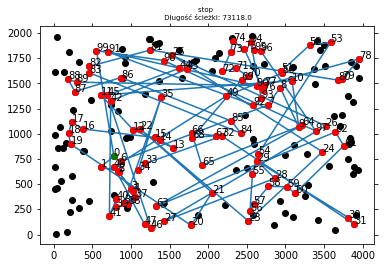

In [123]:
@timing
def cands(path, rest, distance_matrix, n_cands = 5, shuffle = False):
    start_path = path.copy()
    neigh_info = dict()
    for i in range(0, len(distance_matrix)):
        neigh_info[i] = list(find_n_closest_neigh(i, distance_matrix, n_cands))
    
    shuffled_list = [i for i in range(0, len(distance_matrix))]
    if shuffle:
        random.shuffle(shuffled_list)
    moves = []
    
    for v1 in shuffled_list:
        print("p", path)
        if v1 in path:
            v1_left_neigh, v1_right_neigh = my_neighs(v1, path)
            print(v1, v1_left_neigh, v1_right_neigh)
            for v2 in neigh_info[v1]:            
                if v2 in path:
                    v2_left_neigh, v2_right_neigh = my_neighs(v2, path)
                    moves.append(["E", ([v1,v1_right_neigh], [v2,v2_right_neigh])])
                    moves.append(["E",([v1_left_neigh,v1], [v2_left_neigh,v2])])
                else:
                    moves.append(["V", (v1_left_neigh,v2)])
                    moves.append(["V", (v1_right_neigh,v2)])

            print(moves)
            whole_ranking = []
            for move in moves:
                if move[0] == "V":
                    whole_ranking.append(["V", *outer_vertex_swap_cost(move[1], path, distance_matrix)])
                if move[0] == "E":
                    whole_ranking.append(["E",*edge_swap_cost_cands(move[1], distance_matrix)])
            whole_ranking = sorted(whole_ranking, key=operator.itemgetter(1))  
            print(whole_ranking)
            
#             print(whole_ranking[0])
            _type, cost, swaps = whole_ranking[0]
            if cost < 0:
                if _type == "V":
                    swap1, swap2 = swaps
                    swap_item_value_in_list((swap1, swap2), path)
                    swap_item_value_in_list((swap2, swap1), rest)
                    better = True

                if _type == "E":
                    (swap1_1, swap2_0) = swaps
                    swap_items_in_path((swap1_1, swap2_0), path)
                    reverse_part_of_list(swap1_1, swap2_0, path)
                moves = []
                
#             if v1 not in path:
#                 break
            
    return start_path, path
path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = cands(
path, rest, distance_matrix2
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [282]:
# @timing
def cands_best(path, rest, distance_matrix, n_cands = 10, shuffle = False):
    start_path = path.copy()
    neigh_info = dict()
    for i in range(0, len(distance_matrix)):
        neigh_info[i] = list(find_n_closest_neigh(i, distance_matrix, n_cands))
    
    shuffled_list = [i for i in range(0, len(distance_matrix))]
    if shuffle:
        random.shuffle(shuffled_list)
    moves = []
    
    for v1 in shuffled_list:
#         print("p", path)
        for v2 in neigh_info[v1]:            
            if v1 in path and v2 in path:
                v1_left_neigh, v1_right_neigh = my_neighs(v1, path)
                v2_left_neigh, v2_right_neigh = my_neighs(v2, path)
                moves.append(["E", ([v1,v1_right_neigh], [v2,v2_right_neigh])])
                moves.append(["E",([v1_left_neigh,v1], [v2_left_neigh,v2])])
            elif v1 in path or v2 in path:
                v_inpath = v1 if v1 in path else v2
                v_outpath = v1 if v2==v_inpath else v2
                v_left_neigh, v_right_neigh = my_neighs(v_inpath, path)
                moves.append(["V", (v_left_neigh,v_outpath)])
                moves.append(["V", (v_right_neigh,v_outpath)])
            
#         print(moves)
        whole_ranking = []
        for move in moves:
            if move[0] == "V":
                whole_ranking.append(["V", *outer_vertex_swap_cost(move[1], path, distance_matrix)])
            if move[0] == "E":
                whole_ranking.append(["E",*edge_swap_cost_cands(move[1], distance_matrix)])
        whole_ranking = sorted(whole_ranking, key=operator.itemgetter(1))  
#         print(whole_ranking)

#             print(whole_ranking[0])
        if len(whole_ranking) > 0:
            _type, cost, swaps = whole_ranking[0]
            if cost < 0:
                if _type == "V":
                    swap1, swap2 = swaps
                    swap_item_value_in_list((swap1, swap2), path)
                    swap_item_value_in_list((swap2, swap1), rest)
                    better = True

                if _type == "E":
                    (swap1_1, swap2_0) = swaps
                    swap_items_in_path((swap1_1, swap2_0), path)
                    reverse_part_of_list(swap1_1, swap2_0, path)
                moves = []

#             if v1 not in path:
#                 break
            
    return start_path, path,_
# path, rest = create_random_vertexes2(100)
# lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
# distance_matrix = calc_matrix(lat, lon)
# distance_matrix2 = distance_matrix.to_numpy()
# start_path, stop_path, diff = cands_best(
# path, rest, distance_matrix2
# )
# distance_matrix = calc_matrix(lat, lon)
# a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [277]:
def calculate_path_length_numpy(path, distance_matrix_numpy):
    new_path = path.copy()
    new_path.append(new_path[0])
    return sum([
        edge_length_numpy(x,y,distance_matrix_numpy) for (x,y) in get_combs(new_path)
    ])

9.922383069992065
[123, 8, 77, 137, 60, 31, 173, 114, 190, 131, 84, 197, 122, 14, 78, 12, 176, 161, 66, 64, 76, 29, 67, 186, 156, 119, 185, 126, 111, 182, 74, 53, 180, 124, 163, 153, 139, 143, 90, 93, 94, 75, 69, 20, 88, 172, 167, 61, 82, 71, 38, 55, 151, 4, 42, 104, 177, 195, 37, 70, 138, 49, 21, 133, 24, 16, 89, 102, 142, 145, 183, 36, 109, 171, 45, 92, 191, 107, 141, 68, 188, 130, 32, 99, 73, 155, 174, 9, 43, 62, 65, 196, 44, 103, 165, 83, 10, 169, 121, 117]
[123, 8, 77, 137, 60, 31, 173, 114, 190, 131, 84, 197, 122, 14, 78, 12, 176, 161, 66, 64, 76, 29, 67, 186, 156, 119, 185, 126, 111, 182, 74, 53, 180, 124, 163, 153, 139, 143, 90, 93, 94, 75, 69, 20, 88, 172, 167, 61, 82, 71, 38, 55, 151, 4, 42, 104, 177, 195, 37, 70, 138, 49, 21, 133, 24, 16, 89, 102, 142, 145, 183, 36, 109, 171, 45, 92, 191, 107, 141, 68, 188, 130, 32, 99, 73, 155, 174, 9, 43, 62, 65, 196, 44, 103, 165, 83, 10, 169, 121, 117]


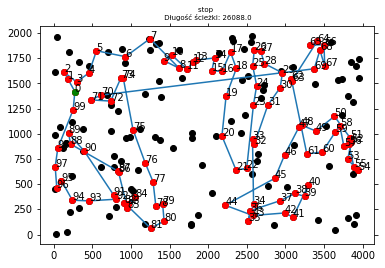

In [286]:
ix, ix_r = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()


def msls(ixxxx, ix_rest, distance_matrix):
    start = time()
    scores = []
    for i in range(100):
#         print(i)
        path = ixxxx.copy()
        rest = ix_rest.copy()
        start_path, stop_path, diff = cands_best(
        path, rest, distance_matrix, shuffle=True
        )
#         distance_matrix = calc_matrix(lat, lon)
        scores.append([calculate_path_length_numpy(stop_path, distance_matrix), stop_path])
    x = sorted(scores, key=operator.itemgetter(0))
    end = time()
    diff = end - start
    return [1], x[0][1], diff

_, stop_path, diff = msls(ix, ix_r, distance_matrix2)
print(diff)
distance_matrix = calc_matrix(lat, lon)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

Elapsed time: 10.10568881034851
[18, 118, 65, 152, 62, 15, 117, 123, 137, 60, 135, 23, 158, 116, 114, 52, 110, 120, 45, 171, 28, 109, 17, 48, 148, 105, 92, 162, 11, 39, 26, 144, 84, 190, 197, 122, 14, 78, 159, 161, 54, 126, 185, 111, 156, 46, 119, 106, 182, 21, 133, 7, 16, 24, 142, 145, 128, 129, 38, 27, 37, 55, 151, 177, 195, 4, 104, 85, 138, 82, 61, 184, 167, 149, 172, 22, 168, 34, 1, 180, 124, 53, 5, 186, 150, 79, 76, 58, 72, 2, 68, 141, 130, 179, 73, 56, 35, 174, 9, 91]
[18, 118, 65, 152, 62, 15, 117, 123, 137, 60, 135, 23, 158, 116, 114, 52, 110, 120, 45, 171, 28, 109, 17, 48, 148, 105, 92, 162, 11, 39, 26, 144, 84, 190, 197, 122, 14, 78, 159, 161, 54, 126, 185, 111, 156, 46, 119, 106, 182, 21, 133, 7, 16, 24, 142, 145, 128, 129, 38, 27, 37, 55, 151, 177, 195, 4, 104, 85, 138, 82, 61, 184, 167, 149, 172, 22, 168, 34, 1, 180, 124, 53, 5, 186, 150, 79, 76, 58, 72, 2, 68, 141, 130, 179, 73, 56, 35, 174, 9, 91]


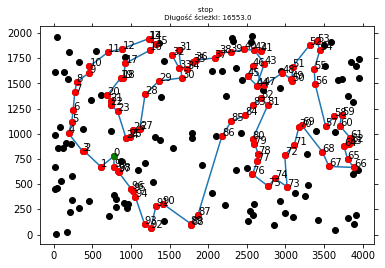

In [323]:
from datetime import datetime, timedelta


def perturbate1(path, rest, no = 4):
    for _ in range(int(no/2)):
        edges = get_edges_except(path)
        (edge1, edge2) = random.choice(edges)
        swap1_1 = edge1[1]
        swap2_0 = edge2[0]
        swap_items_in_path((swap1_1, swap2_0), path)
        reverse_part_of_list(swap1_1, swap2_0, path)
        
        swap1 = random.choice(path)
        swap2 = random.choice(rest)
        swap_item_value_in_list((swap1, swap2), path)
        swap_item_value_in_list((swap2, swap1), rest)

@timing
def ils1(path, rest, distance_matrix, time=10):
    start_path = path.copy()
    _, x, _ = cands_best(path, rest, distance_matrix)
    best_path_len = calculate_path_length_numpy(x, distance_matrix)
    r = rest.copy()
    ctr = 1
    end_time = datetime.now() + timedelta(seconds=time)
    while datetime.now() < end_time:
        y = x.copy()
        rr = r.copy()
        perturbate1(y, rr)
        
        _,y,_ = cands_best(y,rr,distance_matrix)
        ctr += 1
        new_length = calculate_path_length_numpy(y, distance_matrix)
        if new_length < best_path_len:
            x = y
            r = rr
            best_path_len = new_length
            
    return ctr, x

path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
xd = calc_matrix(lat, lon)
start_path, stop_path, diff = ils1(
path, rest, distance_matrix2
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

420 ms ± 43 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
[1, 34, 184, 61, 82, 71, 129, 38, 27, 113, 97, 57, 140, 170, 87, 147, 37, 70, 55, 151, 177, 195, 4, 136, 42, 104, 85, 138, 49, 167, 172, 149, 94, 93, 90, 75, 69, 101, 143, 22, 163, 20, 153, 139, 168, 67, 29, 180, 124, 160, 76, 157, 79, 64, 150, 186, 5, 108, 156, 30, 66, 46, 119, 185, 54, 161, 176, 12, 197, 26, 190, 146, 11, 39, 131, 52, 110, 116, 114, 0, 84, 144, 122, 14, 78, 159, 63, 19, 41, 134, 126, 111, 106, 74, 154, 182, 7, 21, 133, 53]
[1, 34, 184, 61, 82, 71, 129, 38, 27, 113, 97, 57, 140, 170, 87, 147, 37, 70, 55, 151, 177, 195, 4, 136, 42, 104, 85, 138, 49, 167, 172, 149, 94, 93, 90, 75, 69, 101, 143, 22, 163, 20, 153, 139, 168, 67, 29, 180, 124, 160, 76, 157, 79, 64, 150, 186, 5, 108, 156, 30, 66, 46, 119, 185, 54, 161, 176, 12, 197, 26, 190, 146, 11, 39, 131, 52, 110, 116, 114, 0, 84, 144, 122, 14, 78, 159, 63, 19, 41, 134, 126, 111, 106, 74, 154, 182, 7, 21, 133, 53]


([2650,
  2636,
  3113,
  3174,
  3213,
  3394,
  3520,
  3635,
  3729,
  3683,
  3736,
  3853,
  3955,
  3911,
  3808,
  3874,
  3704,
  3646,
  3835,
  3854,
  3822,
  3756,
  3806,
  3875,
  3939,
  3888,
  3564,
  3479,
  3278,
  2991,
  2863,
  3022,
  3297,
  3249,
  3124,
  3099,
  2990,
  2848,
  2936,
  2781,
  2588,
  2576,
  2519,
  2542,
  2573,
  2499,
  2361,
  2599,
  2574,
  2421,
  2178,
  2097,
  2302,
  2232,
  2482,
  2586,
  2687,
  2716,
  2628,
  2433,
  2365,
  2513,
  2576,
  2597,
  2469,
  2290,
  2178,
  2048,
  1724,
  1660,
  1625,
  1393,
  1183,
  1362,
  1424,
  1327,
  1251,
  1234,
  1247,
  1357,
  1533,
  1621,
  1807,
  1838,
  2082,
  2139,
  2318,
  2312,
  2552,
  2573,
  2678,
  2728,
  2721,
  2933,
  2945,
  2961,
  3092,
  3078,
  3085,
  2773,
  2650],
 [802,
  727,
  885,
  1064,
  1085,
  1028,
  1079,
  1174,
  1188,
  1533,
  1542,
  1712,
  1743,
  1673,
  1375,
  1318,
  1082,
  1018,
  963,
  923,
  899,
  882,
  746,
  598,
  640,
 

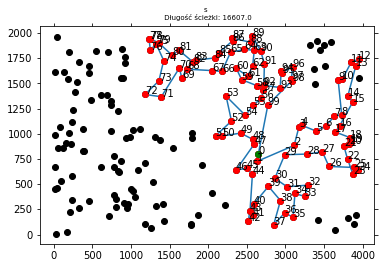

In [247]:
import random
import numpy as np

def find_closest_neigh_not_in_path(neigh, path, distance_matrix):
    for n in np.argsort(distance_matrix[:, neigh]):
        if n not in path:
            return n, distance_matrix[n, neigh]
#     return None

def find_smallest(path, distance_matrix):
    score = 99999999999999
    item_in_path = None
    item_not_in_path = None
    for item in path:
        new_item_not_in_path, new_score = find_closest_neigh_not_in_path(item, path, distance_matrix)
        if new_score < score:
            score = new_score
            item_in_path = item
            item_not_in_path = new_item_not_in_path
    return item_in_path, item_not_in_path

def insert_cost_lowest(point, current_tsp, distance_matrix):
    minimal_points = []
    current_minimal = 1000000000
    for (x, y) in get_combs(current_tsp):
        new_length = edge_length_numpy(point, [x,y], distance_matrix)
        x_y_distance = edge_length_numpy(x,y,distance_matrix)
        total_length_increase = new_length - x_y_distance
        if total_length_increase < current_minimal:
            minimal_points = [x, y]
            current_minimal = total_length_increase
    return minimal_points

def tsp_greedy_repair(tsp_outcome, distance_matrix):
    tsp_outcome.append(tsp_outcome[0])
    while len(tsp_outcome) < 101:
        _,ix_min = find_smallest(tsp_outcome, distance_matrix)
        x, y = insert_cost_lowest(ix_min, tsp_outcome, distance_matrix)
        tsp_outcome = insert_after_element(tsp_outcome, x, ix_min)
    return tsp_outcome[:-1]

path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(distance_matrix)
# find_closest_neigh_not_in_path(1, [4,5,6], distance_matrix2)
# edge_length_numpy(1, [2], distance_matrix2)

# find_smallest([1,2,3], distance_matrix2)
%timeit t = tsp_greedy_repair([1,67,21], distance_matrix2)
distance_matrix = calc_matrix(lat, lon)
create_plot(t, lat, lon, "s", distance_matrix)

Elapsed time: 14.982109308242798
[53, 5, 108, 106, 156, 46, 66, 30, 186, 150, 79, 160, 124, 180, 1, 34, 67, 168, 163, 139, 88, 58, 68, 141, 73, 56, 35, 99, 32, 44, 196, 103, 164, 165, 10, 51, 169, 121, 193, 50, 62, 187, 43, 152, 65, 178, 117, 123, 137, 60, 135, 31, 23, 171, 45, 109, 17, 189, 18, 91, 9, 174, 98, 105, 92, 11, 39, 131, 52, 0, 84, 144, 122, 14, 12, 78, 159, 19, 63, 54, 185, 126, 111, 154, 182, 21, 133, 7, 142, 89, 97, 87, 113, 102, 145, 128, 82, 61, 184, 167]
[53, 5, 108, 106, 156, 46, 66, 30, 186, 150, 79, 160, 124, 180, 1, 34, 67, 168, 163, 139, 88, 58, 68, 141, 73, 56, 35, 99, 32, 44, 196, 103, 164, 165, 10, 51, 169, 121, 193, 50, 62, 187, 43, 152, 65, 178, 117, 123, 137, 60, 135, 31, 23, 171, 45, 109, 17, 189, 18, 91, 9, 174, 98, 105, 92, 11, 39, 131, 52, 0, 84, 144, 122, 14, 12, 78, 159, 19, 63, 54, 185, 126, 111, 154, 182, 21, 133, 7, 142, 89, 97, 87, 113, 102, 145, 128, 82, 61, 184, 167]


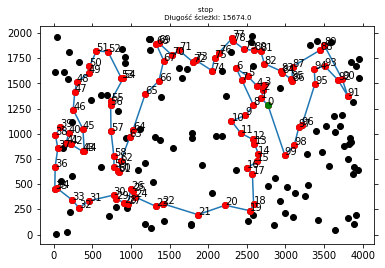

In [322]:
def perturbate2(path, distance_matrix, per = 20):
    random_choiced = random.choices(path, k = int((per/100) * len(path)))
    path = list(set(path) ^ set(random_choiced))
    path = tsp_greedy_repair(path, distance_matrix)
    
@timing
def ils2B(path, rest, distance_matrix, time=10):
    start_path = path.copy()
    _, x, _ = cands_best(path, rest, distance_matrix)
    best_path_len = calculate_path_length_numpy(x, distance_matrix)
    r = rest.copy()
    ctr = 1
    end_time = datetime.now() + timedelta(seconds=time)
    while datetime.now() < end_time:
        y = x.copy()
        rr = r.copy()
        perturbate2(y, distance_matrix)
        
        _,y,_ = cands_best(y,rr,distance_matrix)
        ctr += 1
        new_length = calculate_path_length_numpy(y, distance_matrix)
        if new_length < best_path_len:
            x = y
            r = rr
            best_path_len = new_length
            
    return ctr, x

path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
xd = calc_matrix(lat, lon)
start_path, stop_path, diff = ils2B(
path, rest, distance_matrix2
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

Elapsed time: 4.1019933223724365
[13, 98, 18, 196, 44, 32, 155, 99, 9, 174, 189, 17, 109, 135, 60, 31, 23, 173, 30, 106, 21, 145, 142, 89, 102, 113, 27, 70, 129, 71, 184, 167, 191, 148, 105, 92, 162, 5, 108, 156, 46, 119, 41, 185, 54, 161, 159, 122, 146, 190, 26, 39, 84, 197, 14, 25, 8, 137, 117, 36, 183, 195, 4, 136, 94, 93, 149, 143, 180, 34, 160, 176, 12, 131, 114, 0, 116, 52, 11, 171, 28, 65, 152, 43, 187, 62, 178, 166, 29, 67, 168, 124, 186, 150, 79, 157, 40, 2, 188, 68]
[13, 98, 18, 196, 44, 32, 155, 99, 9, 174, 189, 17, 109, 135, 60, 31, 23, 173, 30, 106, 21, 145, 142, 89, 102, 113, 27, 70, 129, 71, 184, 167, 191, 148, 105, 92, 162, 5, 108, 156, 46, 119, 41, 185, 54, 161, 159, 122, 146, 190, 26, 39, 84, 197, 14, 25, 8, 137, 117, 36, 183, 195, 4, 136, 94, 93, 149, 143, 180, 34, 160, 176, 12, 131, 114, 0, 116, 52, 11, 171, 28, 65, 152, 43, 187, 62, 178, 166, 29, 67, 168, 124, 186, 150, 79, 157, 40, 2, 188, 68]


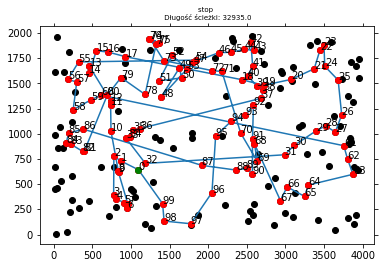

In [303]:
def perturbate2(path, distance_matrix, per = 20):
    random_choiced = random.choices(path, k = int((per/100) * len(path)))
    path = list(set(path) ^ set(random_choiced))
    path = tsp_greedy_repair(path, distance_matrix)
    
@timing
def ils2A(path, rest, distance_matrix, time=10):
    start_path = path.copy()
    _, x, _ = cands_best(path, rest, distance_matrix)
    best_path_len = calculate_path_length_numpy(x, distance_matrix)
    r = rest.copy()
    
    end_time = datetime.now() + timedelta(seconds=time)
    while datetime.now() < end_time:
        y = x.copy()
        rr = r.copy()
        perturbate2(y, distance_matrix)
        
#         _,y,_ = cands_best(y,rr,distance_matrix)
        
        new_length = calculate_path_length_numpy(y, distance_matrix)
        if new_length < best_path_len:
            x = y
            r = rr
            best_path_len = new_length
            
    return start_path, x

path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
xd = calc_matrix(lat, lon)
start_path, stop_path, diff = ils2A(
path, rest, distance_matrix2,time=4
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [330]:
with open("paths.txt", "r") as file:
    data = file.readlines()


def aemmmmmmm4(title, program):
    final_scores = []
    for ix, items in enumerate(data[:10]):
        path = [int(item) for item in items.split()]
        rest = list(set([i for i in range(200)]) - set(path))
        print(ix, path)
        print("p", len(path))
        print("r", len(rest))
        
        lat, lon = get_lat_lon_from_url(target_url=target_url_krob200)
        distance_matrix = calc_matrix(lat, lon)
        distance_matrix2 = distance_matrix.to_numpy()
        
        start = time()
        start_path, stop_path, diff = program(path, rest, distance_matrix2)
        end = time()
        diff = end - start
        
        distance_matrix = calc_matrix(lat, lon)
        path_len = calculate_path_length_numpy(stop_path, distance_matrix2)
        scores = [diff, path_len, stop_path, start_path]
        final_scores.append(scores)

    df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath","Num"])
    df["Time"] = df["Time"].astype("float")
    df["PathLen"] = df["PathLen"].astype("float")
    df["FinalPath"] = df["FinalPath"].astype("object")
    df["Num"] = df["Num"].astype("float")
    
    display(df)
    display(df.describe())
    df.to_csv(title)
    
aemmmmmmm4("ilsssssss2BBB1krob", ils2B)

0 [155, 98, 48, 185, 172, 162, 191, 176, 62, 65, 110, 1, 151, 9, 157, 72, 89, 41, 82, 53, 179, 68, 146, 97, 78, 29, 45, 4, 8, 158, 93, 119, 150, 199, 56, 108, 198, 197, 18, 5, 147, 102, 22, 54, 28, 107, 156, 99, 81, 16, 132, 61, 50, 92, 19, 33, 131, 32, 165, 43, 175, 13, 73, 63, 130, 59, 103, 76, 80, 42, 75, 141, 105, 192, 115, 44, 10, 144, 189, 23, 177, 153, 77, 137, 180, 181, 126, 135, 196, 125, 169, 60, 90, 171, 104, 87, 21, 190, 178, 195]
p 100
r 100
Elapsed time: 12.9498291015625
1 [81, 25, 192, 145, 24, 79, 78, 154, 127, 150, 148, 185, 62, 28, 139, 16, 49, 10, 59, 39, 47, 136, 48, 166, 134, 119, 130, 189, 20, 155, 102, 8, 95, 45, 188, 9, 114, 100, 4, 38, 116, 191, 75, 77, 135, 84, 137, 131, 96, 26, 54, 23, 129, 58, 164, 157, 193, 6, 0, 57, 179, 178, 53, 152, 37, 142, 21, 112, 74, 109, 104, 132, 87, 17, 46, 176, 151, 89, 158, 159, 170, 61, 140, 66, 181, 144, 72, 85, 33, 22, 199, 13, 190, 18, 56, 60, 174, 3, 55, 138]
p 100
r 100
Elapsed time: 10.223165512084961
2 [163, 134, 13, 171

<ipython-input-330-e89232b8565b>:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath","Num"])


,Time,PathLen,FinalPath,Num
0,12.949829,17270.0,"[113, 167, 132, 164, 73, 177, 60, 106, 174, 16...",9.0
1,10.223166,17686.0,"[108, 1, 154, 77, 16, 44, 17, 23, 152, 159, 14...",38.0
2,15.972416,16839.0,"[141, 84, 121, 92, 10, 157, 27, 128, 90, 96, 9...",9.0
3,13.041393,17976.0,"[113, 167, 164, 73, 177, 198, 144, 65, 3, 32, ...",7.0
4,10.124111,20471.0,"[120, 47, 30, 62, 109, 41, 119, 124, 105, 139,...",31.0
5,11.144881,16813.0,"[173, 0, 89, 20, 45, 8, 24, 145, 151, 107, 165...",13.0
6,10.866264,17947.0,"[53, 162, 57, 83, 6, 56, 93, 179, 175, 26, 70,...",15.0
7,14.506662,17511.0,"[107, 20, 89, 0, 94, 173, 160, 11, 97, 31, 28,...",6.0
8,12.069212,15329.0,"[136, 95, 35, 16, 191, 186, 125, 62, 47, 120, ...",10.0
9,10.559013,17789.0,"[87, 138, 172, 140, 187, 112, 178, 78, 126, 79...",20.0


,Time,PathLen,Num
count,10.000000,10.000000,10.000000
mean,12.145695,17563.100000,15.800000
std,1.961059,1291.281831,10.799177
min,10.124111,15329.000000,6.000000
25%,10.635826,16946.750000,9.000000
50%,11.607046,17598.500000,11.500000
75%,13.018502,17907.500000,18.750000
max,15.972416,20471.000000,38.000000


In [306]:
def create_plot_numpy(tsp_outcome, lat, lon, title, distance_matrix, ndm):
    plt.cla()
    print(tsp_outcome)
    x, y = [], []
    plt.scatter(lat, lon, color="black")
    for i, vertex in enumerate(tsp_outcome):
        # print(vertex,lat[vertex],lon[vertex])
        x.append(lat[vertex])
        y.append(lon[vertex])
        plt.scatter(lat[vertex], lon[vertex], color="red", zorder=2)
        plt.annotate(i, (lat[vertex], lon[vertex]))
    x.append(x[0])
    y.append(y[0])
    plt.scatter(lat[tsp_outcome[0]], lon[tsp_outcome[0]], color="green", zorder=2)
    plt.plot(x, y, zorder=1)
    print(tsp_outcome)
    path_length = calculate_path_length_numpy(tsp_outcome, ndm)
    # plt.figtext(0.0, 1.0, "Path length {path_length}".format(path_length=path_length),horizontalalignment ="center",
    #             wrap = True, fontsize = 10,
    #             bbox ={'facecolor':'grey',
    #                    'alpha':0.3, 'pad':5})

    plt.title(f"{title} \n Długość ścieżki: {path_length}", fontsize=7)
    plt.savefig(f"{title}.png", format="png", dpi=1200)

    return x, y

       Unnamed: 0       Time       PathLen
count    10.00000  10.000000     10.000000
mean      4.50000  10.967954  26461.600000
std       3.02765   0.816863    703.468265
min       0.00000   9.984607  24997.000000
25%       2.25000  10.263411  26324.500000
50%       4.50000  11.010636  26599.000000
75%       6.75000  11.501284  26738.750000
max       9.00000  12.452717  27345.000000
   Unnamed: 0       Time  PathLen  \
8           8  11.621939  24997.0   

                                           FinalPath  
8  [85, 137, 110, 193, 116, 39, 38, 148, 69, 189,...  

[85, 137, 110, 193, 116, 39, 38, 148, 69, 189, 25, 100, 99, 149, 68, 74, 180, 79, 87, 22, 21, 103, 192, 159, 118, 95, 136, 91, 18, 199, 101, 40, 35, 17, 23, 143, 183, 64, 123, 187, 112, 80, 178, 78, 140, 53, 162, 153, 51, 59, 73, 164, 113, 167, 177, 130, 34, 156, 198, 117, 105, 139, 182, 15, 77, 12, 154, 13, 119, 41, 108, 1, 124, 63, 109, 30, 194, 120, 146, 14, 32, 82, 56, 26, 70, 97, 28, 135, 98, 7, 157, 10, 2, 94, 0, 20, 

([3084,
  3060,
  3452,
  3503,
  3600,
  3684,
  3829,
  3935,
  3938,
  3599,
  3123,
  2995,
  3060,
  3062,
  3162,
  2929,
  2944,
  2800,
  1612,
  1538,
  1517,
  1346,
  1272,
  1017,
  366,
  468,
  460,
  347,
  387,
  278,
  202,
  171,
  380,
  694,
  844,
  1203,
  2334,
  2503,
  2597,
  2592,
  2656,
  2630,
  2581,
  2614,
  2347,
  1829,
  1819,
  1766,
  1782,
  1729,
  1794,
  1768,
  1623,
  1632,
  2028,
  2050,
  2426,
  2214,
  1994,
  1109,
  1009,
  1021,
  997,
  749,
  399,
  376,
  401,
  839,
  778,
  627,
  555,
  556,
  811,
  782,
  464,
  71,
  80,
  386,
  555,
  706,
  731,
  1090,
  2132,
  2489,
  2741,
  3114,
  3417,
  3373,
  3515,
  3507,
  3805,
  3858,
  3675,
  3220,
  3140,
  3133,
  3058,
  2740,
  2982,
  3023,
  3084],
 [774,
  781,
  637,
  301,
  459,
  445,
  513,
  540,
  516,
  514,
  217,
  264,
  155,
  329,
  367,
  485,
  632,
  653,
  328,
  224,
  266,
  408,
  246,
  333,
  339,
  319,
  267,
  252,
  190,
  165,
  233,
  514,

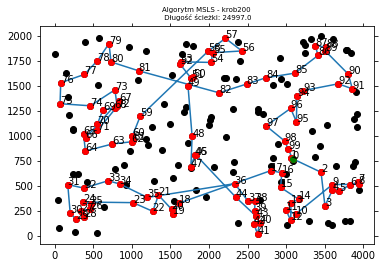

In [331]:
c = pd.read_csv("msls")
print(c.describe())
nn = c.loc[c["PathLen"] == c["PathLen"].min()]
print(nn)
print()
lat, lon = get_lat_lon_from_url(target_url=target_url_krob200)
distance_matrix = calc_matrix(lat, lon)
ndm = distance_matrix.to_numpy()
l = nn.FinalPath.to_list()[0]
new = l.replace(",", " ")
new = new[1:-1]
ne = new.split()
p = [int(i) for i in ne]
create_plot_numpy(
    p,
    lat,
    lon,
    "Algorytm MSLS - krob200",
    distance_matrix,
    ndm
)